# Lending Club Case Study - Exploratory Data Analysis

##### Group Members: 
1. Aniket tote
2. Ashish kumar Rajpurohit
3. Siddeswara Basireddy
4. Vikas Kumar Pandey

### Assignment Summary:

You work for a consumer finance company **Lending Club** which specialises in lending various types of loans to urban customers. This company is the largest online loan marketplace, facilitating personal loans, business loans, and financing of medical procedures. Borrowers can easily access lower interest rate loans through a fast online interface. When the company receives a loan application, the company has to **make a decision for loan approval based on the applicant’s profile.**
When a person applies for a loan, there are two types of decisions that could be taken by the company:

**1. Loan accepted:** If the company approves the loan, there are 3 possible scenarios described below:

**Fully paid:** Applicant has fully paid the loan (the principal and the interest rate)

**Current:** Applicant is in the process of paying the instalments, i.e. the tenure of the loan is not yet completed. These candidates are not labelled as 'defaulted'.

**Charged-off:** Applicant has not paid the instalments in due time for a long period of time, i.e. he/she has defaulted on the loan 

**2. Loan rejected:** The company had rejected the loan (because the candidate does not meet their requirements etc.). Since the loan was rejected, there is no transactional history of those applicants with the company and so this data is not available with the company (and thus in this dataset)

### Business Objectives

The company wants to understand the driving factors (or driver variables) behind loan default, i.e. the variables which are strong indicators of default.  The company can utilise this knowledge for its portfolio and risk assessment.

## Exploratory Data Analysis

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
import datetime

import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import distributions as dists
from scipy.stats import norm
from scipy import stats

import warnings
warnings.filterwarnings("ignore")
pd.set_option('max_columns',105)
pd.options.display.float_format = '{:.4f}'.format

#### Loading loan data from CSV

In [2]:
loan_df = pd.read_csv('loan.csv')

#### Data Understanding using describe, info and head

In [3]:
loan_df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,...,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0000,36 months,10.65%,162.8700,B,B2,NaN,10+ years,RENT,24000.0000,Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.6500,0,Jan-85,1,nan,nan,3,0,13648,83.70%,9,f,0.0000,0.0000,5863.1552,5833.8400,5000.0000,863.1600,0.0000,0.0000,0.0000,Jan-15,171.6200,NaN,May-16,0.0000,nan,1,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,0.0000,0,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,0.0000,0.0000,nan,nan,nan,nan
1,1077430,1314167,2500,2500,2500.0000,60 months,15.27%,59.8300,C,C4,Ryder,< 1 year,RENT,30000.0000,Source Verified,Dec-11,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.0000,0,Apr-99,5,nan,nan,3,0,1687,9.40%,4,f,0.0000,0.0000,1008.7100,1008.7100,456.4600,435.1700,0.0000,117.0800,1.1100,Apr-13,119.6600,NaN,Sep-13,0.0000,nan,1,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,0.0000,0,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,0.0000,0.0000,nan,nan,nan,nan
2,1077175,1313524,2400,2400,2400.0000,36 months,15.96%,84.3300,C,C5,NaN,10+ years,RENT,12252.0000,Not Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,small_business,real estate business,606xx,IL,8.7200,0,Nov-01,2,nan,nan,2,0,2956,98.50%,10,f,0.0000,0.0000,3005.6668,3005.6700,2400.0000,605.6700,0.0000,0.0000,0.0000,Jun-14,649.9100,NaN,May-16,0.0000,nan,1,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,0.0000,0,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,0.0000,0.0000,nan,nan,nan,nan
3,1076863,1277178,10000,10000,10000.0000,36 months,13.49%,339.3100,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0000,Source Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.0000,0,Feb-96,1,35.0000,nan,10,0,5598,21%,37,f,0.0000,0.0000,12231.8900,12231.8900,10000.0000,2214.9200,16.9700,0.0000,0.0000,Jan-15,357.4800,NaN,Apr-16,0.0000,nan,1,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,0.0000,0,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,0.0000,0.0000,na

In [4]:
loan_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB


In [5]:
loan_df.describe()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
count,39717.0000,39717.0000,39717.0000,39717.0000,39717.0000,39717.0000,39717.0000,39717.0000,39717.0000,39717.0000,14035.0000,2786.0000,39717.0000,39717.0000,39717.0000,39717.0000,39717.0000,39717.0000,39717.0000,39717.0000,39717.0000,39717.0000,39717.0000,39717.0000,39717.0000,39717.0000,39661.0000,0.0000,39717.0000,0.0000,0.0000,0.0000,39717.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,39661.0000,39717.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,39020.0000,39678.0000,0.0000,0.0000,0.0000,0.0000
mean,683131.9131,850463.5594,11219.4438,10947.7132,10397.4489,324.5619,68968.9264,13.3151,0.1465,0.8692,35.9010,69.6981,9.2944,0.0551,13382.5281,22.0888,51.2279,50.9898,12153.5965,11567.1491,9793.3488,2263.6632,1.3630,95.2216,12.4061,2678.8262,0.0000,nan,1.0000,nan,nan,nan,0.0000,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,0.0000,0.0000,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,0.0433,0.0000,nan,nan,nan,nan
std,210694.1329,265678.3074,7456.6707,7187.2387,7128.4504,208.8749,63793.7658,6.6786,0.4918,1.0702,22.0201,43.8225,4.4003,0.2372,15885.0166,11.4017,375.1728,373.8245,9042.0408,8942.6726,7065.5221,2608.1120,7.2900,688.7448,148.6716,4447.1360,0.0000,nan,0.0000,nan,nan,nan,0.0000,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,0.0000,0.0000,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,0.2043,0.0000,nan,nan,nan,nan
min,54734.0000,70699.0000,500.0000,500.0000,0.0000,15.6900,4000.0000,0.0000,0.0000,0.0000,0.0000,0.0000,2.0000,0.0000,0.0000,2.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,nan,1.0000,nan,nan,nan,0.0000,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,0.0000,0.0000,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,0.0000,0.0000,nan,nan,nan,nan
25%,516221.0000,666780.0000,5500.0000,5400.0000,5000.0000,167.0200,40404.0000,8.1700,0.0000,0.0000,18.0000,22.0000,6.0000,0.0000,3703.0000,13.0000,0.0000,0.0000,5576.9300,5112.3100,4600.0000,662.1800,0.0000,0.0000,0.0000,218.6800,0.0000,nan,1.0000,nan,nan,nan,0.0000,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,0.0000,0.0000,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan

In [6]:
loan_df.shape

(39717, 111)

Drops constant value columns of pandas dataframe. Columns having same values in all columns

In [7]:
def drop_constant_columns(df):
    keep_columns = [col for col in df.columns if (len(df[col].unique()) > 1)]
    print(keep_columns)
    return df[keep_columns].copy()

loan_df=drop_constant_columns(loan_df)
loan_df.shape

['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title', 'emp_length', 'home_ownership', 'annual_inc', 'verification_status', 'issue_d', 'loan_status', 'url', 'desc', 'purpose', 'title', 'zip_code', 'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line', 'inq_last_6mths', 'mths_since_last_delinq', 'mths_since_last_record', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries', 'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt', 'next_pymnt_d', 'last_credit_pull_d', 'collections_12_mths_ex_med', 'chargeoff_within_12_mths', 'pub_rec_bankruptcies', 'tax_liens']


(39717, 51)

In [8]:
loan_df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,chargeoff_within_12_mths,pub_rec_bankruptcies,tax_liens
0,1077501,1296599,5000,5000,4975.0000,36 months,10.65%,162.8700,B,B2,NaN,10+ years,RENT,24000.0000,Verified,Dec-11,Fully Paid,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.6500,0,Jan-85,1,nan,nan,3,0,13648,83.70%,9,0.0000,0.0000,5863.1552,5833.8400,5000.0000,863.1600,0.0000,0.0000,0.0000,Jan-15,171.6200,NaN,May-16,0.0000,0.0000,0.0000,0.0000
1,1077430,1314167,2500,2500,2500.0000,60 months,15.27%,59.8300,C,C4,Ryder,< 1 year,RENT,30000.0000,Source Verified,Dec-11,Charged Off,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.0000,0,Apr-99,5,nan,nan,3,0,1687,9.40%,4,0.0000,0.0000,1008.7100,1008.7100,456.4600,435.1700,0.0000,117.0800,1.1100,Apr-13,119.6600,NaN,Sep-13,0.0000,0.0000,0.0000,0.0000
2,1077175,1313524,2400,2400,2400.0000,36 months,15.96%,84.3300,C,C5,NaN,10+ years,RENT,12252.0000,Not Verified,Dec-11,Fully Paid,https://lendingclub.com/browse/loanDetail.acti...,NaN,small_business,real estate business,606xx,IL,8.7200,0,Nov-01,2,nan,nan,2,0,2956,98.50%,10,0.0000,0.0000,3005.6668,3005.6700,2400.0000,605.6700,0.0000,0.0000,0.0000,Jun-14,649.9100,NaN,May-16,0.0000,0.0000,0.0000,0.0000
3,1076863,1277178,10000,10000,10000.0000,36 months,13.49%,339.3100,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0000,Source Verified,Dec-11,Fully Paid,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.0000,0,Feb-96,1,35.0000,nan,10,0,5598,21%,37,0.0000,0.0000,12231.8900,12231.8900,10000.0000,2214.9200,16.9700,0.0000,0.0000,Jan-15,357.4800,NaN,Apr-16,0.0000,0.0000,0.0000,0.0000
4,1075358,1311748,3000,3000,3000.0000,60 months,12.69%,67.7900,B,B5,University Medical Group,1 year,RENT,80000.0000,Source Verified,Dec-11,Current,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > I plan on combi...,other,Personal,972xx,OR,17.9400,0,Jan-96,0,38.0000,nan,15,0,27783,53.90%,38,524.0600,524.0600,3513.3300,3513.3300,2475.9400,1037.3900,0.0000,0.0000,0.0000,May-16,67.7900,Jun-16,May-16,0.0000,0.0000,0.0000,0.0000


Dropping all columns having value 0, NA and NaN inclusive.

In [9]:
filter_column_with_0_NaN = loan_df.replace([0,'NA'], np.nan).apply(lambda x: any(~x.isnull()))
loan_df = loan_df.loc[:,filter_column_with_0_NaN]

In [15]:
filter_column_with_0_NaN

id                             True
member_id                      True
loan_amnt                      True
funded_amnt                    True
funded_amnt_inv                True
term                           True
int_rate                       True
installment                    True
grade                          True
sub_grade                      True
emp_title                      True
emp_length                     True
home_ownership                 True
annual_inc                     True
verification_status            True
issue_d                        True
loan_status                    True
url                            True
desc                           True
purpose                        True
title                          True
zip_code                       True
addr_state                     True
dti                            True
delinq_2yrs                    True
earliest_cr_line               True
inq_last_6mths                 True
mths_since_last_delinq      

In [11]:
loan_df.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'url', 'desc', 'purpose', 'title', 'zip_code',
       'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line',
       'inq_last_6mths', 'mths_since_last_delinq', 'mths_since_last_record',
       'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv',
       'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries',
       'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt',
       'next_pymnt_d', 'last_credit_pull_d', 'pub_rec_bankruptcies'],
      dtype='object')

In [12]:
len(loan_df.columns)

48

### Removal of addition columns that would not help much in our EDA

1. Both the columns 'member_id' and 'id' has unique values hence removed
2. emp_title is actually company names and there are huge number of unique values hence removed
3. Url column has same website name with Id appended at end which is all unique hence removed
4. Desc column as an equivalent short and consise information is present in the purpose and title column of the data.
5. Zipcode column doesn't have full information of the region hence removed
6. title is a text column with too many unique values hence removed

In [13]:
additional_remove_col=['member_id','emp_title','url','desc','zip_code','title']
# Removing the based on above criteria from dataframe
loan_df=loan_df[list(set(loan_df.columns)-set(additional_remove_col))]
len(loan_df.columns)

42

Calculate the percent of values in a column with missing values. From those columns we
can filter out the features with more than 50% NULL values and then drop those columns from the DataFrame.

In [14]:
pct_null = loan_df.isnull().sum() / len(loan_df)
missing_features = pct_null[pct_null > 0.50].index
missing_features

Index(['mths_since_last_delinq', 'mths_since_last_record', 'next_pymnt_d'], dtype='object')

Let's remove column with more than 50% of data is missing, as they are not going to add any value 
for our analysis

In [15]:
loan_df.drop(missing_features, axis=1, inplace=True)

Let's examin further for missing values.

In [16]:
missing = round(100*(loan_df.isnull().sum()/len(loan_df.id)), 2)
missing[missing != 0]

revol_util             0.1300
pub_rec_bankruptcies   1.7500
emp_length             2.7100
last_pymnt_d           0.1800
last_credit_pull_d     0.0100
dtype: float64

In [19]:
print("unique last_credit_pull_d : %d"  % len(loan_df.last_credit_pull_d.unique()))
print("unique emp_length : %d"  % len(loan_df.emp_length.unique()))
print("unique revol_util : %d"  % len(loan_df.revol_util.unique()))
print("unique pub_rec_bankruptcies : %d"  % len(loan_df.pub_rec_bankruptcies.unique()))
print("unique last_pymnt_d : %d" % len(loan_df.last_pymnt_d.unique()))

unique last_credit_pull_d : 107
unique emp_length : 12
unique revol_util : 1090
unique pub_rec_bankruptcies : 4
unique last_pymnt_d : 102


Columns emp_length and pub_rec_bankruptcies are clearly Categorical with values belonging to a range.
Let's take a look at all the different values of these Categorical columns

In [20]:
loan_df.emp_length.unique()

array(['10+ years', '< 1 year', '1 year', '3 years', '8 years', '9 years',
       '4 years', '5 years', '6 years', '2 years', '7 years', nan],
      dtype=object)

In [21]:
loan_df.pub_rec_bankruptcies.unique()

array([ 0.,  1.,  2., nan])

lets look at the pub_rec_bankruptcies categorical column with 1.76% missing data. It tells us about the past number of public record bankruptcies of that borrower.

In [22]:
loan_df.pub_rec_bankruptcies.value_counts()

0.0000    37339
1.0000     1674
2.0000        7
Name: pub_rec_bankruptcies, dtype: int64

pub_rec_bankruptcies can be seen to have taking values like [0,1,2]. Almost 37000 records with 0 record of bankrupcies, 1600 records having one bankrupcies case and 7 records with two bankrupcies case. 
While we could have taken the mode representation of the data which is 0 bankrupcies to impute the missing values. But, we decide to remove the rows instead so that we ensure we dont add any bais to the data.

In [23]:
loan_df=loan_df[~loan_df.pub_rec_bankruptcies.isnull()]

Next, the columns emp_length have 2.71% missing value. This column have information about the customer/borrower employment length in years. Let's remove the rows with nan/blank values for these varaibles.

revol_util gives the revolving line utilization and 
last_pymnt_d gives the month in which last payment was received.
Let's remove the rows with null value for last_pymnt_d and revol_util variables.

In [24]:
loan_df=loan_df[~loan_df.emp_length.isnull()]
loan_df=loan_df[~loan_df.revol_util.isnull()]
loan_df=loan_df[~loan_df.last_pymnt_d.isnull()]
loan_df.shape

(37836, 39)

In [25]:
missing = round(100*(loan_df.isnull().sum()/len(loan_df.id)), 2)
missing[missing != 0]

Series([], dtype: float64)

Now, we have now reduced the data set to have 37836 loan records and 39 attributes with no missing values. 

### Further shortlist and narrow down the columns for analysis

Let's now analyse all the columns in the resulted dataframe and find only the ones with are required or make sense for the analysis.

In [26]:
loan_df.nunique().sort_values()

term                           2
loan_status                    3
pub_rec_bankruptcies           3
verification_status            3
home_ownership                 4
pub_rec                        5
grade                          7
inq_last_6mths                 9
emp_length                    11
delinq_2yrs                   11
purpose                       14
sub_grade                     35
open_acc                      38
addr_state                    49
issue_d                       52
total_acc                     81
last_credit_pull_d            97
last_pymnt_d                  97
int_rate                     337
earliest_cr_line             514
loan_amnt                    869
funded_amnt                 1031
revol_util                  1087
out_prncp                   1096
out_prncp_inv               1097
total_rec_late_fee          1274
collection_recovery_fee     2488
dti                         2863
recoveries                  3781
annual_inc                  5027
total_rec_

There are a few columns having a single unique value or all unique values. These may have nothing much to contribute to the analysis i.e. columns which are far from being the driving columns towards loan default. Some other columns are redundant.

1. __funded_amnt__
:<br> value for this column is almost equivalent to loan_amnt. removing to avoid multi colinearity.
2. __funded_amnt_inv__
:<br> value for this column is almost equivalent to funded_amnt. removing to avoid multi colinearity. Also this wont be available at the time of decision making of funding a loan.
3. __id__
:<br>is a random number given to the loan, does not contribute to analysis

In [27]:
columns_to_be_dropped = ['funded_amnt','funded_amnt_inv','id']
loan_df= loan_df.drop(columns_to_be_dropped,axis=1)

In [28]:
#After removing missing data % of every columns in dataframe.
missing_values = pd.DataFrame((loan_df.isnull().sum()/len(loan_df))*100, columns = ['Missing%']).sort_values('Missing%',ascending = False)
missing_values

,Missing%
last_credit_pull_d,0.0026
total_acc,0.0000
sub_grade,0.0000
loan_status,0.0000
int_rate,0.0000
loan_amnt,0.0000
issue_d,0.0000
open_acc,0.0000
grade,0.0000
term,0.0000


In [29]:
loan_df.shape

(37836, 36)

In [30]:
loan_df.head()

,total_acc,sub_grade,revol_util,inq_last_6mths,pub_rec_bankruptcies,addr_state,dti,total_pymnt,delinq_2yrs,total_rec_prncp,recoveries,verification_status,revol_bal,purpose,total_rec_late_fee,earliest_cr_line,total_pymnt_inv,emp_length,out_prncp_inv,last_pymnt_d,loan_status,last_credit_pull_d,int_rate,loan_amnt,issue_d,open_acc,grade,term,annual_inc,total_rec_int,home_ownership,out_prncp,installment,last_pymnt_amnt,pub_rec,collection_recovery_fee
0,9,B2,83.70%,1,0.0000,AZ,27.6500,5863.1552,0,5000.0000,0.0000,Verified,13648,credit_card,0.0000,Jan-85,5833.8400,10+ years,0.0000,Jan-15,Fully Paid,May-16,10.65%,5000,Dec-11,3,B,36 months,24000.0000,863.1600,RENT,0.0000,162.8700,171.6200,0,0.0000
1,4,C4,9.40%,5,0.0000,GA,1.0000,1008.7100,0,456.4600,117.0800,Source Verified,1687,car,0.0000,Apr-99,1008.7100,< 1 year,0.0000,Apr-13,Charged Off,Sep-13,15.27%,2500,Dec-11,3,C,60 months,30000.0000,435.1700,RENT,0.0000,59.8300,119.6600,0,1.1100
2,10,C5,98.50%,2,0.0000,IL,8.7200,3005.6668,0,2400.0000,0.0000,Not Verified,2956,small_business,0.0000,Nov-01,3005.6700,10+ years,0.0000,Jun-14,Fully Paid,May-16,15.96%,2400,Dec-11,2,C,36 months,12252.0000,605.6700,RENT,0.0000,84.3300,649.9100,0,0.0000
3,37,C1,21%,1,0.0000,CA,20.0000,12231.8900,0,10000.0000,0.0000,Source Verified,5598,other,16.9700,Feb-96,12231.8900,10+ years,0.0000,Jan-15,Fully Paid,Apr-16,13.49%,10000,Dec-11,10,C,36 months,49200.0000,2214.9200,RENT,0.0000,339.3100,357.4800,0,0.0000
4,38,B5,53.90%,0,0.0000,OR,17.9400,3513.3300,0,2475.9400,0.0000,Source Verified,27783,other,0.0000,Jan-96,3513.3300,1 year,524.0600,May-16,Current,May-16,12.69%,3000,Dec-11,15,B,60 months,80000.0000,1037.3900,RENT,524.0600,67.7900,67.7900,0,0.0000


## Data Manipulation

### Term
Remove months from term column to convert it into numeric it will be easy.

In [31]:
loan_df['term'] = loan_df['term'].str.rstrip('months')

### int_rate
Remove "%" from int_rate column. To convert it into numeric it will be easy.

In [32]:
loan_df['int_rate'] = loan_df['int_rate'].str.rstrip('%')

### emp_length
Remove years and year from column and replace 10+ with 10 ,<1 and n/a with 0.

In [33]:
loan_df['emp_length'] = loan_df['emp_length'].str.rstrip('years year +')
loan_df['emp_length'] = loan_df['emp_length'].str.replace('< 1', '0').str.replace('n/a', '0')

### revol_util
1. Remove "%" from revol_util column. To convert it into numeric it will be easy.
2. Converting continuos variables to numeric for simplicity of calculation and analysis.

In [34]:
loan_df['revol_util'] = loan_df['revol_util'].str.rstrip('%')

In [35]:
loan_df[['int_rate', 'revol_util']] = loan_df[['int_rate','revol_util']].apply(pd.to_numeric)

In [36]:
loan_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37836 entries, 0 to 39680
Data columns (total 36 columns):
total_acc                  37836 non-null int64
sub_grade                  37836 non-null object
revol_util                 37836 non-null float64
inq_last_6mths             37836 non-null int64
pub_rec_bankruptcies       37836 non-null float64
addr_state                 37836 non-null object
dti                        37836 non-null float64
total_pymnt                37836 non-null float64
delinq_2yrs                37836 non-null int64
total_rec_prncp            37836 non-null float64
recoveries                 37836 non-null float64
verification_status        37836 non-null object
revol_bal                  37836 non-null int64
purpose                    37836 non-null object
total_rec_late_fee         37836 non-null float64
earliest_cr_line           37836 non-null object
total_pymnt_inv            37836 non-null float64
emp_length                 37836 non-null object
out_p

Converting the dtype of below columns to datetime
1. issue_d
2. earliest_cr_line
3. last_pymnt_d
4. last_credit_pull_d

In [37]:
loan_df.issue_d = pd.to_datetime(loan_df.issue_d, format='%b-%y')
loan_df.earliest_cr_line = pd.to_datetime(loan_df.earliest_cr_line, format='%b-%y')
loan_df.last_pymnt_d = pd.to_datetime(loan_df.last_pymnt_d, format='%b-%y')
loan_df.last_credit_pull_d = pd.to_datetime(loan_df.last_credit_pull_d, format='%b-%y')

### Derived Metrics

Lets split the available date into month and year column.

**earliest_cr_line:** The month the borrower's earliest reported credit line was opened. Let's split the date column into earliest_cr_line_month and earliest_cr_line_year

**issue_d:** The month which the loan was funded .Lets split the available date into month and year column.

In [38]:
# Date Convertion of issue_d
loan_df['issue_year'] = loan_df['issue_d'].dt.year
loan_df['issue_month'] = loan_df['issue_d'].dt.month

loan_df['earliest_cr_line_month'] = loan_df['earliest_cr_line'].dt.month
loan_df['earliest_cr_line_year'] = loan_df['earliest_cr_line'].dt.year

loan_df['last_pymnt_d_month']= loan_df['last_pymnt_d'].dt.month
loan_df['last_pymnt_d_year']= loan_df['last_pymnt_d'].dt.year

In [39]:
# Create bin for annual income
loan_df['annual_inc_slab'] = loan_df.annual_inc.apply(lambda x : '0_5k' if x <=5000 else '5k_10K' 
                                                      if (x>5000 and x<=10000) else '10k_20K' 
                                                      if (x>10000 and x<=20000) else '20k_30K' 
                                                      if (x>20000 and x<=30000) else '30k_40K' 
                                                      if (x>30000 and x<=40000) else '40k_50K'
                                                      if (x>40000 and x<=50000) else '50k_60K' 
                                                      if (x>50000 and x<=60000) else '60k_70K' 
                                                      if (x>60000 and x<=70000) else '70k_80K' 
                                                      if (x>70000 and x<=80000) else '80k_90K'
                                                      if (x>80000 and x<=90000) else '90k_100K'
                                                      if (x>90000 and x<=100000) else '100+k')

In [40]:
# Create bin for loan amount
loan_df['loan_amnt_slab'] = loan_df.loan_amnt.apply(lambda x : '0_5k' if x <=5000 else '5k_10K' 
                                                      if (x>5000 and x<=10000) else '10k_15K' 
                                                      if (x>10000 and x<=15000) else '15k_20K' 
                                                      if (x>15000 and x<=20000) else '20k_25K' 
                                                      if (x>20000 and x<=25000) else '25k_30K'
                                                      if (x>25000 and x<=30000) else '30k_35K' 
                                                      if (x>30000 and x<=35000) else '35k_40K' 
                                                      if (x>35000 and x<=40000) else '40k_45K' 
                                                      if (x>40000 and x<=45000) else 'above_45K' )

In [41]:
loan_df.drop(loan_df.loc[loan_df['earliest_cr_line_year']> 2019].index, inplace=True)
loan_df[loan_df['earliest_cr_line_year'] > 2019 ]['earliest_cr_line_year'].unique()

array([], dtype=int64)

In [42]:
loan_df.shape

(37777, 44)

## Outlier Treatment
Lets pick some continous variable to see if there are any outliers.

In [39]:
# Prints the quantile information of all numeric data type columns in dataframe to identify outliers.
def print_quantiles_per_column_in_dict(df):     
    from pandas.api.types import is_numeric_dtype
    outliersList={}     
    for name in list(df.columns):         
        if is_numeric_dtype(df[name]):             
            outliersList[name]=df[name].quantile([0.0, .25, .75, 1.0]).values    
    for key,val in outliersList.items():
        print(f'{key} \n Min :: {val[0]}\n 0.25 :: {val[1]}\n 0.75 :: {val[2]}\n Max :: {val[3]}')

In [40]:
print_quantiles_per_column_in_dict(loan_df)

pub_rec 
 Min :: 0.0
 0.25 :: 0.0
 0.75 :: 0.0
 Max :: 4.0
total_rec_late_fee 
 Min :: 0.0
 0.25 :: 0.0
 0.75 :: 0.0
 Max :: 180.2
delinq_2yrs 
 Min :: 0.0
 0.25 :: 0.0
 0.75 :: 0.0
 Max :: 11.0
loan_amnt 
 Min :: 500.0
 0.25 :: 5600.0
 0.75 :: 15000.0
 Max :: 35000.0
total_acc 
 Min :: 2.0
 0.25 :: 14.0
 0.75 :: 29.0
 Max :: 90.0
total_pymnt_inv 
 Min :: 0.0
 0.25 :: 5384.8
 0.75 :: 16096.88
 Max :: 58563.68
out_prncp 
 Min :: 0.0
 0.25 :: 0.0
 0.75 :: 0.0
 Max :: 6311.47
open_acc 
 Min :: 2.0
 0.25 :: 6.0
 0.75 :: 12.0
 Max :: 44.0
annual_inc 
 Min :: 4000.0
 0.25 :: 41820.0
 0.75 :: 83500.0
 Max :: 6000000.0
inq_last_6mths 
 Min :: 0.0
 0.25 :: 0.0
 0.75 :: 1.0
 Max :: 8.0
last_pymnt_amnt 
 Min :: 0.01
 0.25 :: 224.77
 0.75 :: 3402.61
 Max :: 36115.2
total_rec_int 
 Min :: 6.22
 0.25 :: 677.1
 0.75 :: 2888.05
 Max :: 23563.68
collection_recovery_fee 
 Min :: 0.0
 0.25 :: 0.0
 0.75 :: 0.0
 Max :: 7002.19
int_rate 
 Min :: 5.42
 0.25 :: 9.32
 0.75 :: 14.61
 Max :: 24.59
pub_rec_bankru

By seeing the above quantiles data for numeric datatype continous variable colums we can see that annual_inc has outliers by seeing **0.75 quantile** and **Max Value** 83500.0 & 6000000.0 respectively
Lets plot the boxplot of **annual_inc**

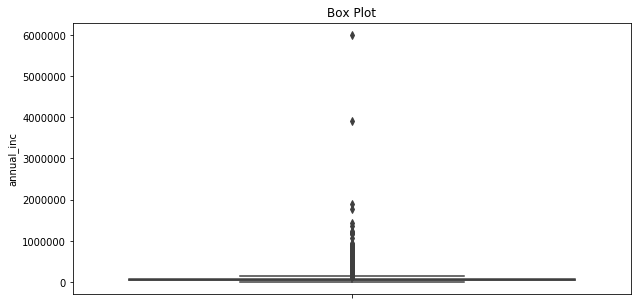

In [43]:
def box_plot_outlier_detect(df):
    plt.figure(figsize=(10,5))
    sns.boxplot(data =df, x=df['annual_inc'],orient='v')
    plt.title("Box Plot")
    #sns.scatterplot(x=loan['annual_inc'], y=loan['annual_inc'], data=loan)
    plt.show()
    
box_plot_outlier_detect(loan_df)    

Lets remove values between 90% to 100%

In [42]:
loan_df = loan_df[loan_df["annual_inc"] < loan_df["annual_inc"].quantile(0.90)]
loan_df["annual_inc"].describe()

count    33968.0000
mean     58059.3230
std      23570.4656
min       4000.0000
25%      40000.0000
50%      55000.0000
75%      75000.0000
max     116765.0000
Name: annual_inc, dtype: float64

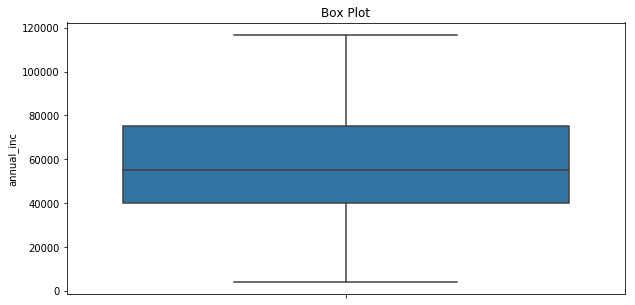

In [43]:
box_plot_outlier_detect(loan_df)

## III) Univariate Analysis

### A) Quantitative Variables
   A numerical or continuous variable (attribute) is one that may take on any value within a finite or infinite interval. 
These finite or infinite intervals we can visualise using diffrent statistical metrics isualization methods such as Boxplot,Histogram/Distribution Plot.

1. Loan Amount

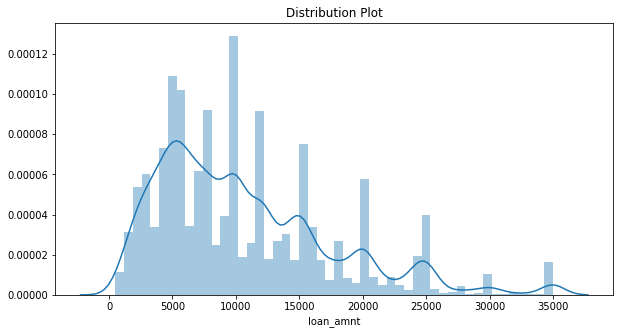

In [44]:
plt.figure(figsize=(10,5))
#sns.boxplot(data =loan, x=loan['loan_amnt'],orient='v')
#plt.title("Box Plot")
sns.distplot(loan_df['loan_amnt'])
plt.title("Distribution Plot")
plt.show()

**Insights: Most of the loan amounts are distributed between 5000 to 20000.**

2. Annual Income

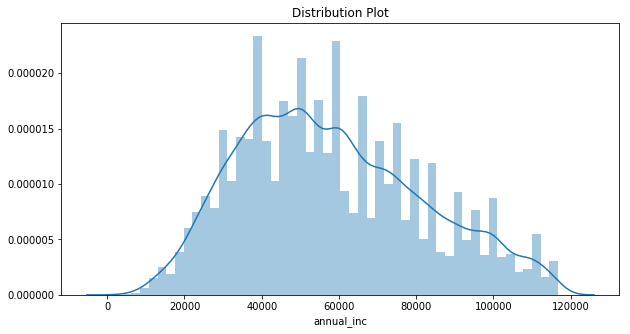

In [45]:
plt.figure(figsize=(10,5))
#sns.boxplot(data =loan, x=loan['loan_amnt'],orient='v')
#plt.title("Box Plot")
sns.distplot(loan_df['annual_inc'])
plt.title("Distribution Plot")
plt.show()

Insights: Most of the applicants earns beteen 40000 to 75000 annually.

In [46]:
def plot_univariant_analysis_for_categorical_col(df, array): 
    sns.set(style="darkgrid")
    total = float(len(df)) # one loan per row 
    for col in array:
        plt.figure(figsize=(20,6))
        ax = sns.countplot(x=col,data=df,palette=sns.color_palette("Set2"))
        plt.xlabel(col)
        plt.ylabel('Frequency of occurence')
        plt.title('Loans distribution by '+col, fontsize = 14)
        plt.xticks(rotation=45)
        for p in ax.patches:
            height = np.nan_to_num(p.get_height(), 0)
            ax.text(p.get_x()+p.get_width()/2.,
                    height + 3,
                    '{:1.2f}'.format(100 * height/total)+' %',
                    ha="center") 

## Frequency distribution of below variables:
**loan_status**, **term**, **verification_status**, **home_ownership**, **grade**, **emp_length**, **purpose**, **addr_state**, **sub_grade**, **inq_last_6mths**, **open_acc**, **pub_rec** , **delinq_2yrs**, **pub_rec_bankruptcies**

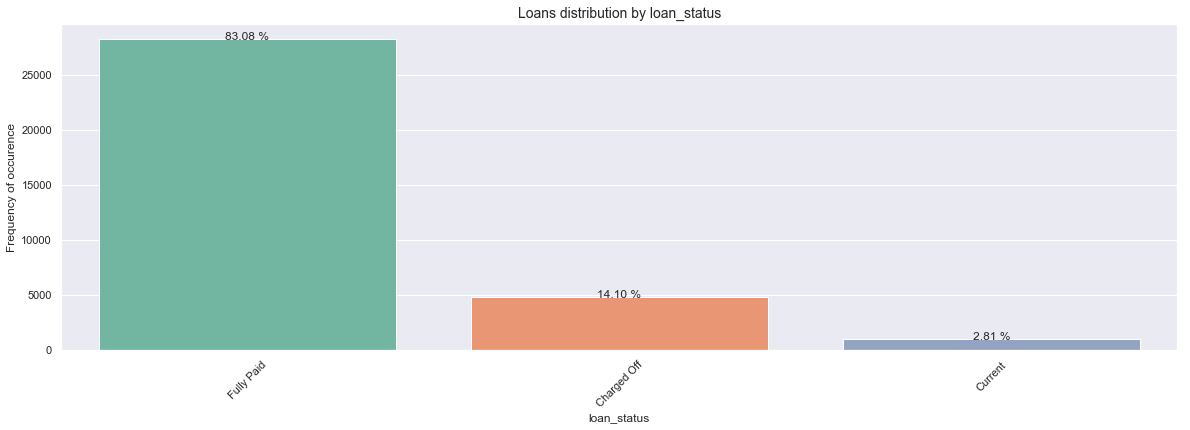

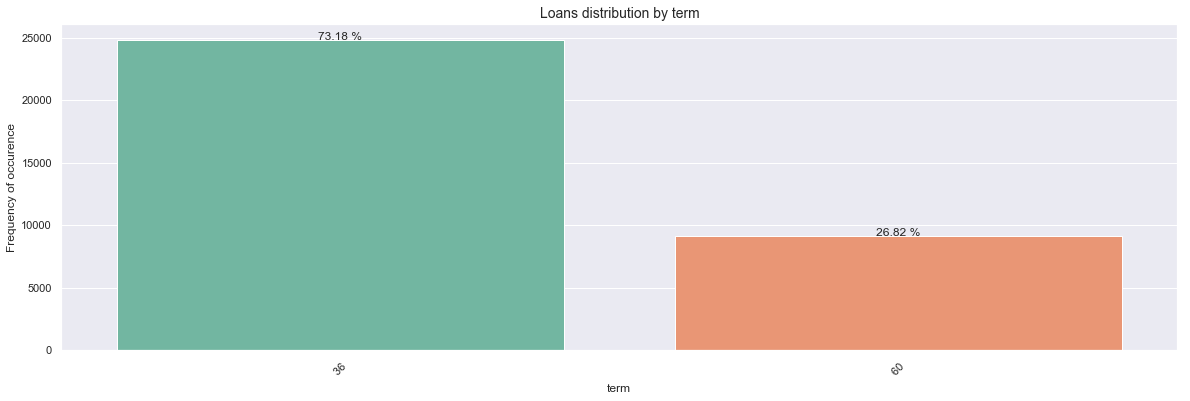

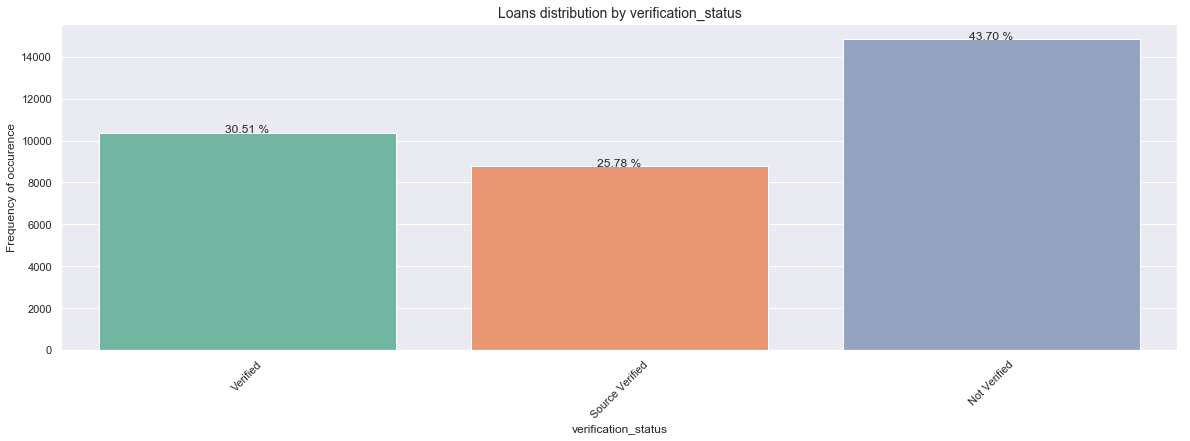

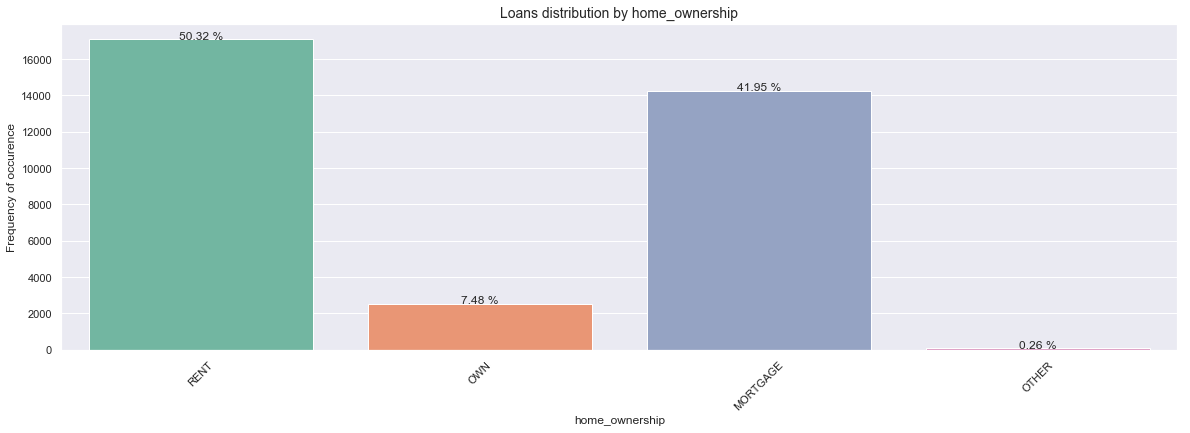

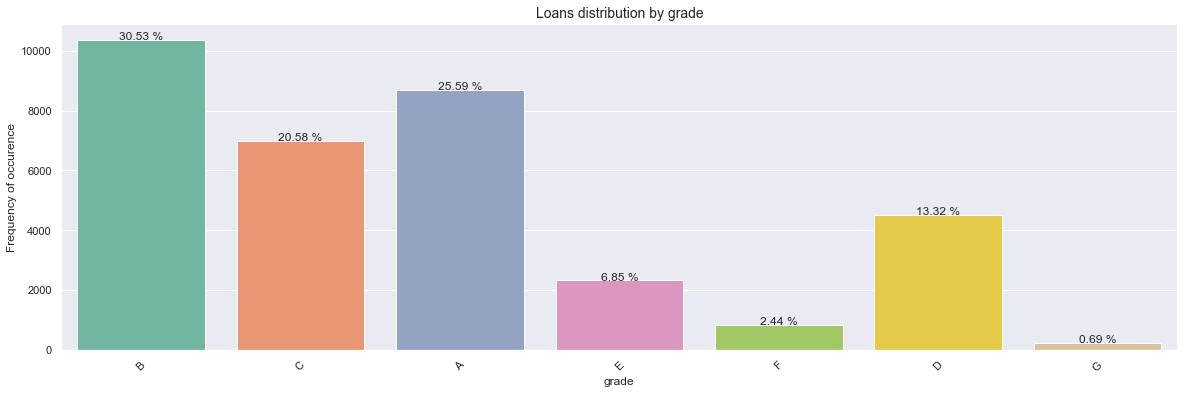

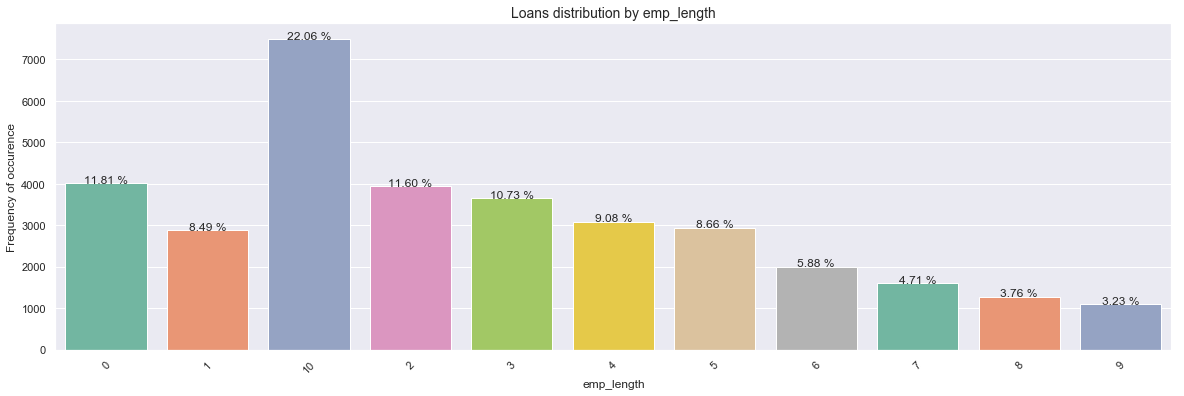

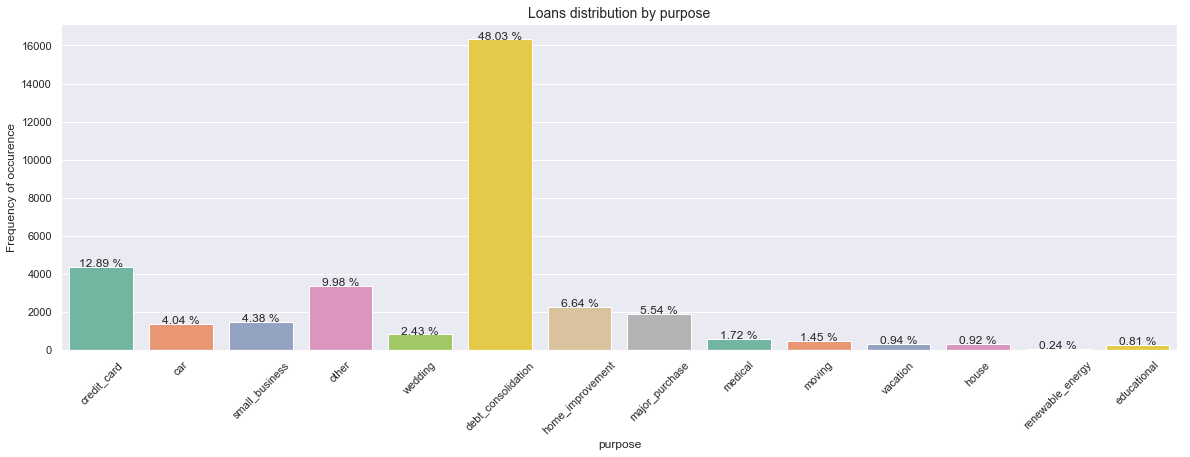

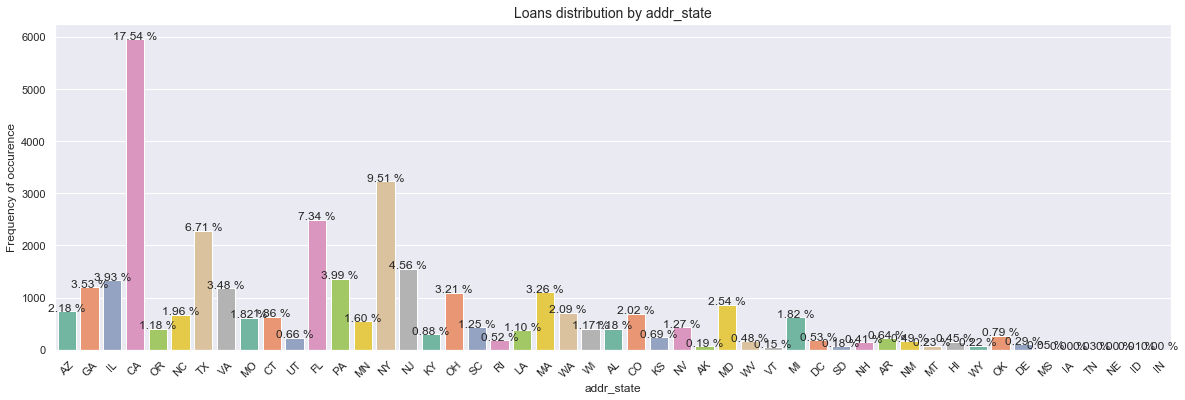

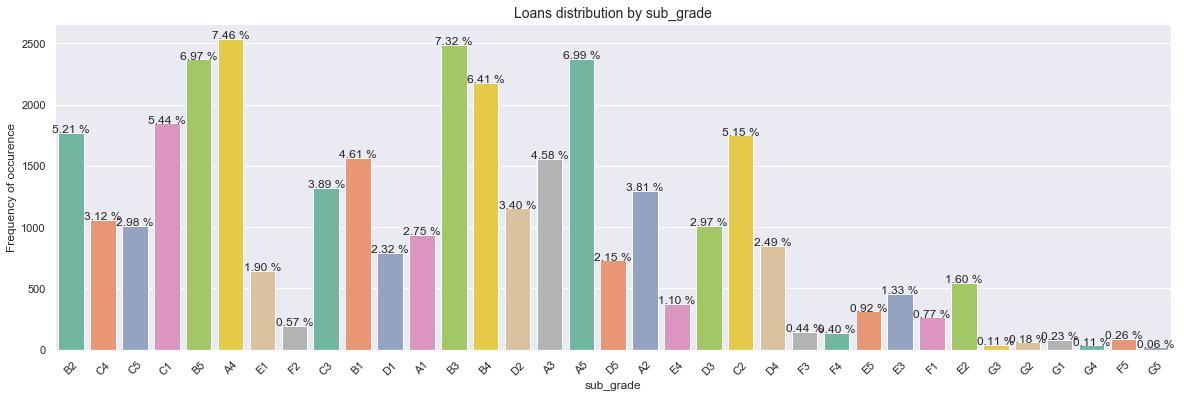

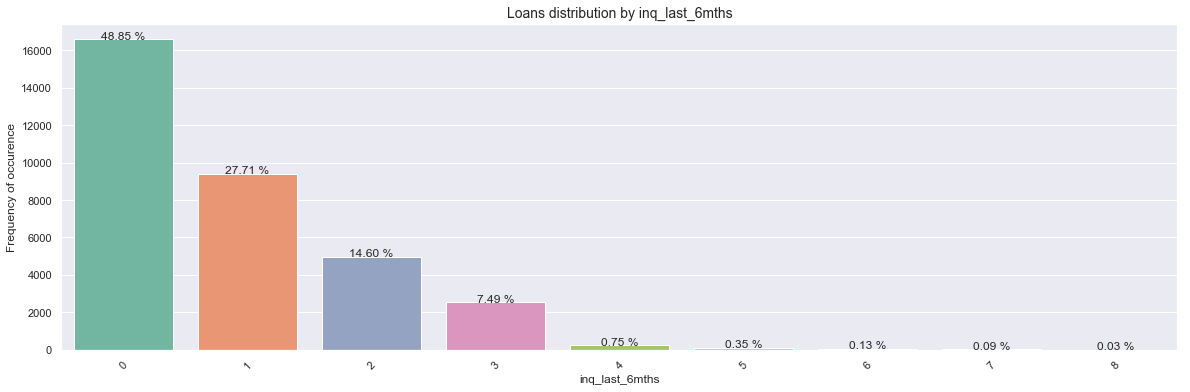

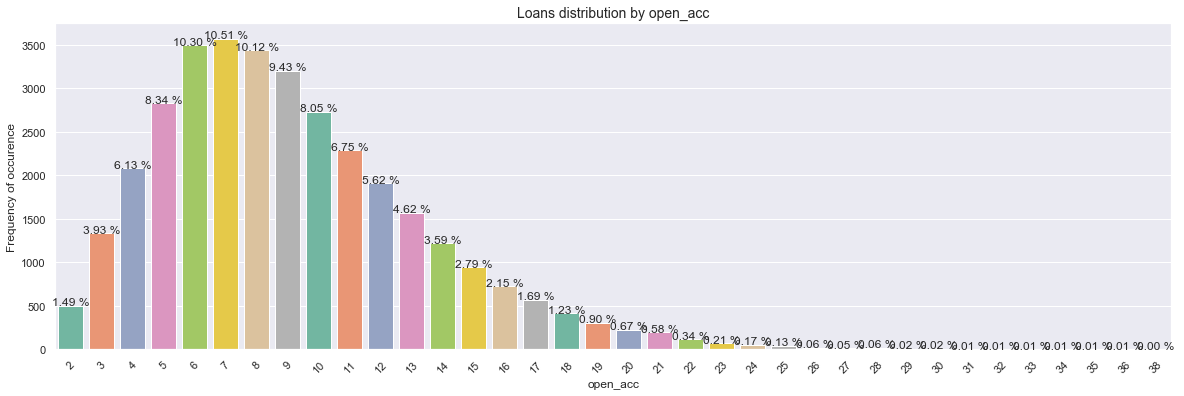

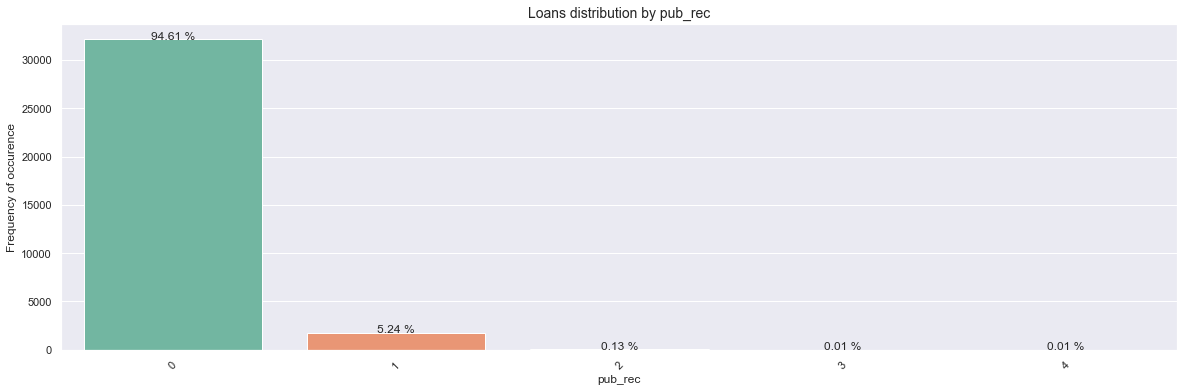

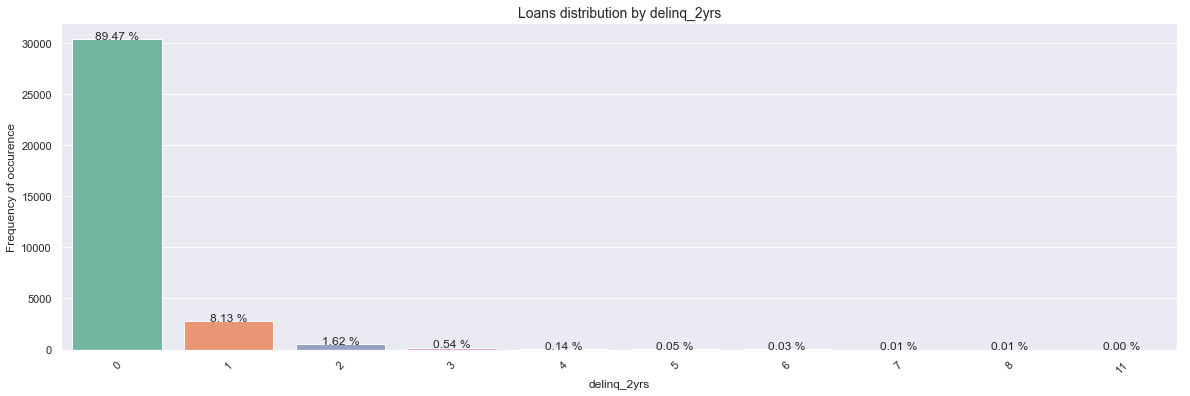

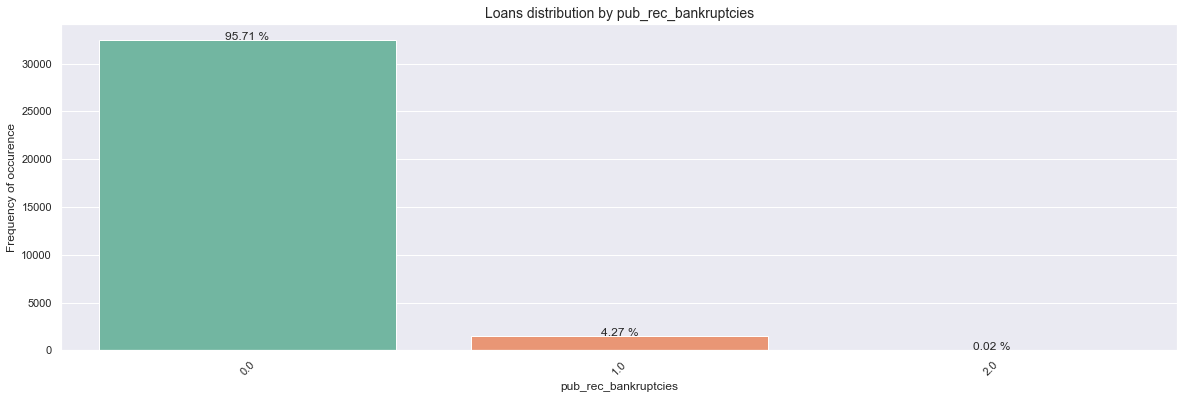

In [47]:
array = ['loan_status','term','verification_status','home_ownership', 'grade',  
                 'emp_length', 'purpose', 'addr_state', 'sub_grade','inq_last_6mths','open_acc','pub_rec','delinq_2yrs','pub_rec_bankruptcies']
plot_univariant_analysis_for_categorical_col(loan_df, array)

Insights: 
    1. 14.1 % of the applicants Charged off.
    2. Max(48.03%) of the applicants applied loan for paying their other loans(Debt Consolidation).
    3. 73.18% of applicants applied loan for 36 months term period.
    4. Most of the loan taken from CA, NY and FL etc.
    5. Approx 48% of the applicants applied loan for paying their other loans(Debt Consolidation).
    6. Around 31% loans come under B grade.

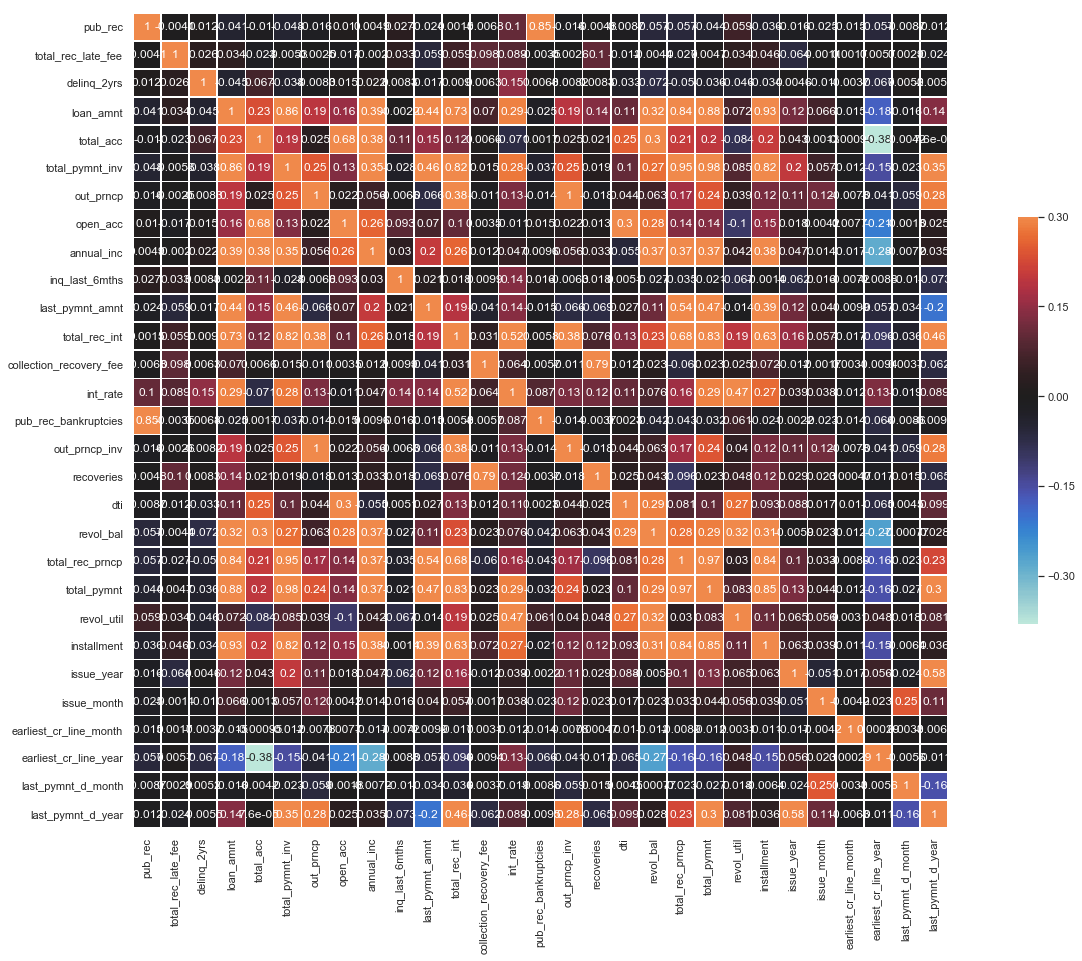

In [48]:
#Function created to build correlation matrix among data
def column_correlations(df):
    numeric_variables = df.select_dtypes(exclude=["object"])
    corr = df.corr()
    f, ax = plt.subplots(figsize=(25, 15))
    sns.heatmap(corr,   vmax=.3, center=0,annot=True,
                square=True, linewidths=.5, cbar_kws={"shrink": .5})
    
#Build Correaltion matrix for data
column_correlations(loan_df)

<h4>Insights from above plots:</h4>
<ul>
<li> On focusing only on closely nitted red cell we found funded_amnt,total_rec_prncp,total_payment,annual_inc are highly correlated</li>
<li> similarly revol_bal,total_rec_int,ate_pymnt_amnt is also highly correlated </li>
<li> we see verification_status,earliest_cr_line_year has -tive correlation to most of the column </li>
<li> we see out_prncp_inv and out_prncp are higly correlated, we can ignore one of them </li>
<li> we see pub_rec and pub_rec_bankruptcies are highly correlated, we can ignore one of them </li>
<li> we see loan_amnt, total_rec_prncp and total_rec_int are highly correlated, we can keep one of them. Lets keep loan_amnt </li>
<ul>

- **total_rec_late_fee** column dosn't makes any significance to predict loan default as this is the late fee which is payed after late payment or default. We can drop this column from our analysis.

Lets drop the column which are correlated in any way. By seeing the correlation matrix below are the columns which can be ignored :-
1. collection_recovery_fee
2. out_prncp_inv
3. pub_rec
4. total_rec_late_fee
5. recoveries
6. total_rec_prncp
7. total_rec_int
8. earliest_cr_line_month
9. last_pymnt_d_month

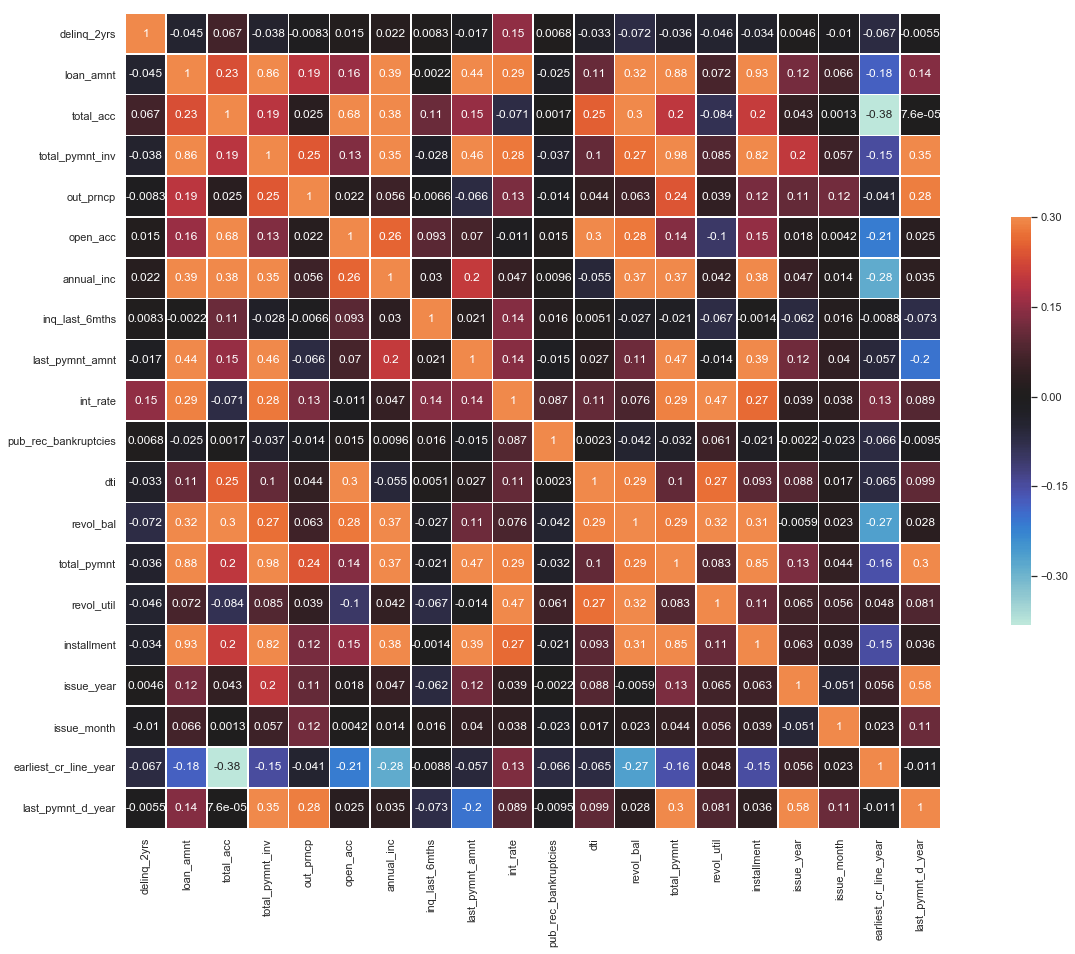

In [49]:
loan_df.drop(['collection_recovery_fee','out_prncp_inv','pub_rec', 'total_rec_late_fee', 'recoveries', 'total_rec_prncp',
          'total_rec_int', 'earliest_cr_line_month','last_pymnt_d_month'], axis = 1, inplace=True)
column_correlations(loan_df)

In [50]:
# put labels based on dataframe grouped by loan_status and column passed to method at runtime.
def plotVerticalLabels(ax, dictVar=None):
    plt.margins(0.2, 0.2)
    locs, labels = plt.xticks()
    counts = {}
    for key, value in dictVar:
        counts[str(key)] = value
    i = 0
    for p in ax.patches:
        height = np.nan_to_num(p.get_height(), 0)
        try:
            ax.text(p.get_x()+p.get_width()/2.,
                height,
                '{:.1f} %'.format(height) + "\nof " + str(counts[str(labels[i].get_text())]),
                ha="center") 
        except:
            ax.text(p.get_x()+p.get_width()/2.,
                height,
                '{:.1f}%'.format(height),
                ha="center") 
        i = i+1

In [51]:
# plots against loan_status(charged off) by given column in ratio.
def plot_ratio_against_loan_status_by_column(df, by, loanstatus='Charged Off'):
    grp = df.groupby(['loan_status',by])[by].count()
    cnt = df.groupby(by)[by].count()
    total = float(len(grp))
    ratios = grp.unstack() * 100 / cnt.T
    ax = ratios.loc[loanstatus].plot.bar(color=sns.color_palette('husl', 16))
    ax.set_ylabel('% of loans ' + loanstatus)
    plotVerticalLabels(ax, grp[loanstatus].to_dict().items())
    plt.margins(0.2, 0.2)
    plt.tight_layout()
    return ax

In [52]:
# put labels based on dataframe grouped by loan_status and column passed to method at runtime.
def plotLabels(ax):   
    plt.margins(0.2, 0.2)
    for p in ax.patches:
        height = np.nan_to_num(p.get_height(), 0)
        ax.text(p.get_x()+p.get_width()/2.,
                height,
                '{:.1f}%'.format(height),
                ha="center")       

In [53]:
# Subplots of percentage of a categorical variable in the entire dataset on left side and on right side percentage 
# for Charged Off loans (ratio distribution)
def sub_plot_ratio_of_loan_status_by_column(df, by, sortbyindex=False):
    plt.subplot(1, 2, 1)
    values = (df[by].value_counts(normalize=True)*100)
    if sortbyindex:
        values = values.sort_index()
    ax = values.plot.bar(color=sns.color_palette('husl', 16))
    ax.set_ylabel('no. of loan (%)', fontsize=16)
    ax.set_xlabel(by, fontsize=12)
    plotLabels(ax)
    plt.subplot(1, 2, 2)
    values = (df.loc[df['loan_status']=='Charged Off'][by].value_counts(normalize=True)*100)
    if sortbyindex:
        values = values.sort_index()
    ax = values.plot.bar(color=sns.color_palette('husl', 16))
    ax.set_ylabel('Charged Off loan ratio (%)', fontsize=16)
    plotLabels(ax)

In [54]:
# This method plots a distribution of target column, and its boxplot against loan_status column
def plot_distribution(df, col):
    plt.figure(figsize=(15,5))
    plt.subplot(1, 2, 1)
    ax = sns.distplot(df[col])
    plt.subplot(1, 2, 2)
    sns.boxplot(x=df[col], y=df['loan_status'], data=df)
    plt.show()

## Bivariate Analysis

**Column : recoveries**  

**Insight:**
- Recoveries column data is not available during loan request . This data is only available once loan is Charged Off.
- It does not make any link to find default rate using this variable so we will drop this variable.


**Column : pub_rec_bankruptcies**  



In [55]:
loan_df.columns

Index(['verification_status', 'purpose', 'grade', 'issue_d', 'sub_grade',
       'delinq_2yrs', 'last_credit_pull_d', 'loan_amnt', 'total_acc',
       'total_pymnt_inv', 'out_prncp', 'home_ownership', 'open_acc', 'term',
       'emp_length', 'earliest_cr_line', 'annual_inc', 'inq_last_6mths',
       'last_pymnt_amnt', 'addr_state', 'last_pymnt_d', 'int_rate',
       'pub_rec_bankruptcies', 'loan_status', 'dti', 'revol_bal',
       'total_pymnt', 'revol_util', 'installment', 'issue_year', 'issue_month',
       'earliest_cr_line_year', 'last_pymnt_d_year', 'annual_inc_slab',
       'loan_amnt_slab'],
      dtype='object')

In [56]:
loan_df.pub_rec_bankruptcies.unique()

array([0., 1., 2.])

In [57]:

loan_df.pub_rec_bankruptcies.value_counts()

0.0000    32510
1.0000     1452
2.0000        6
Name: pub_rec_bankruptcies, dtype: int64

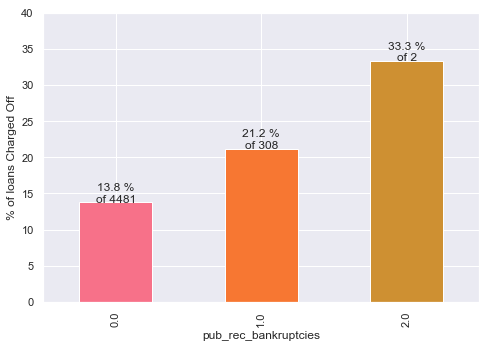

In [58]:
plt.figure(figsize=(7,5))
plot_ratio_against_loan_status_by_column(loan_df, 'pub_rec_bankruptcies')


**pub_rec_bankruptcies** having scalar ordered values. Almost 30000+ records with 0 record of bankrupcies, around 1500 records having 1 bankrupcies record and 6 records with 2 bankrupcies records only.

**Insight:**
- pub_rec_bankruptcies column data exlains about number of time borower has declared for bankruptcies.
- We can see ,if pub_rec_bankruptcies increases than chances of loan defaulting is more.



**Column : installment**  

installment column data exlains about installment amount of loan, which borrow need to pay .

In [59]:
loan_df.installment.describe()

count   33968.0000
mean      308.1424
std       193.2542
min        16.0800
25%       163.4875
50%       269.2400
75%       404.2700
max      1302.6900
Name: installment, dtype: float64

In [60]:
loan_df.groupby('loan_status')['installment'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,4791.0000,323.6292,203.9104,22.7900,168.3550,284.1900,432.3550,1302.6900
Current,955.0000,374.2119,191.7136,21.7400,247.2150,356.2100,495.8700,967.8600
Fully Paid,28222.0000,303.2776,190.8912,16.0800,161.8100,263.2850,397.1500,1272.2000


<Figure size 1080x360 with 0 Axes>

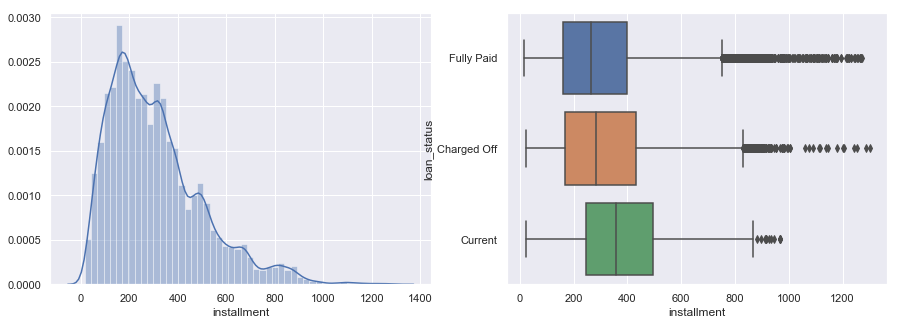

In [61]:
# Chart to see the distribution of installment amount

plt.figure(figsize=(15,5))
plot_distribution(loan_df, 'installment')

**Insight:**

- We can see that **Charged Off** loans have high installment amount.

**Column : Term**

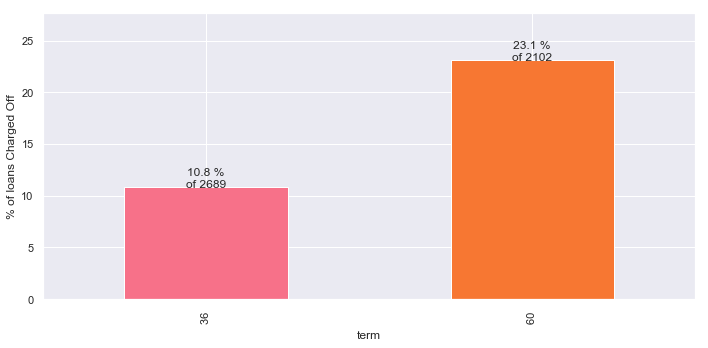

In [62]:
plt.figure(figsize=(10,5))
plot_ratio_against_loan_status_by_column(loan_df, 'term')

**Insight:**

- We can see that 60month term is having more chances of **Charged Off** as compare to 36month term.

**Column : open_acc**  

This column show how many credit lines a borrowr holds.

In [63]:
loan_df.open_acc.describe()

count   33968.0000
mean        9.1182
std         4.2903
min         2.0000
25%         6.0000
50%         8.0000
75%        11.0000
max        38.0000
Name: open_acc, dtype: float64

In [64]:
loan_df.groupby('loan_status')['open_acc'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,4791.0000,9.0787,4.4111,2.0000,6.0000,8.0000,11.0000,38.0000
Current,955.0000,9.6984,4.1843,2.0000,7.0000,9.0000,12.0000,32.0000
Fully Paid,28222.0000,9.1052,4.2718,2.0000,6.0000,8.0000,11.0000,36.0000


<Figure size 1080x360 with 0 Axes>

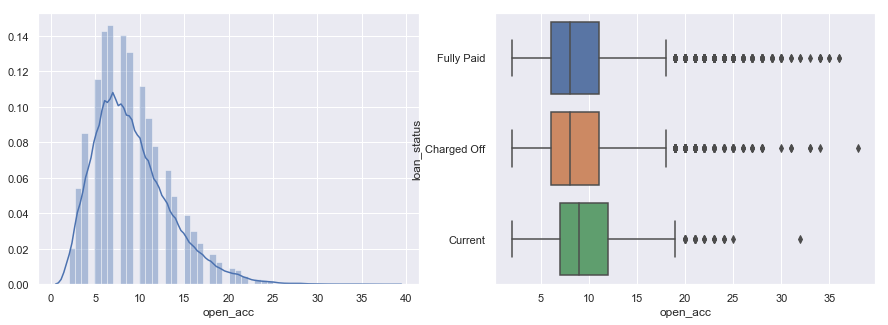

In [65]:
# Chart to see open credit line distribution

plt.figure(figsize=(15,5))
plot_distribution(loan_df, 'open_acc')
plt.show()

**Insight:**

- We can see that no. of credit line doesn't make any difference between **Charged Off** or **Fully Paid**  accounts.

**Column : revol_util**  

This column shows borrowrs % utilization of revolving credit line.

In [66]:
loan_df.revol_util.describe()

count   33968.0000
mean       48.9606
std        28.1338
min         0.0000
25%        25.8000
50%        49.4000
75%        72.2000
max        99.9000
Name: revol_util, dtype: float64

<Figure size 1080x360 with 0 Axes>

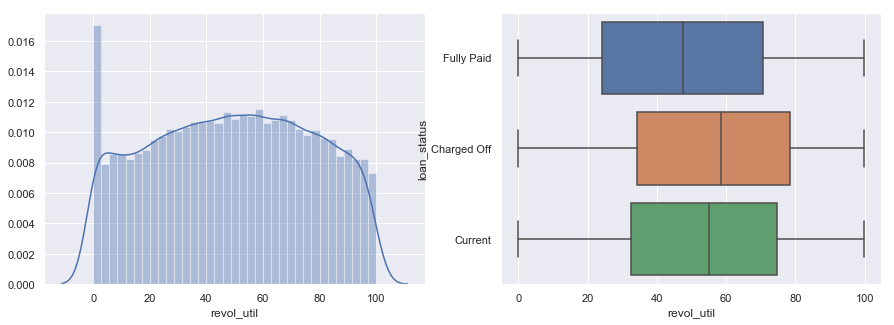

In [67]:
# Chart to distribution of revol_util

plt.figure(figsize=(15,5))
plot_distribution(loan_df, 'revol_util')
plt.show()

**Insight:**

- We can see that average utilization is 50%.
- **Charged Off** loans utilizes if more in compare to **Fully Paid**  accounts.
- We know that if revolving credit line utilization more than , borrowr's remaining credit limit reduces.

**Column : revol_bal**  

This column shows total balance of revolving credit line.

In [68]:
loan_df.revol_bal.describe()

count    33968.0000
mean     11761.8860
std      12496.3263
min          0.0000
25%       3576.7500
50%       8410.0000
75%      15722.2500
max     149000.0000
Name: revol_bal, dtype: float64

<Figure size 1080x360 with 0 Axes>

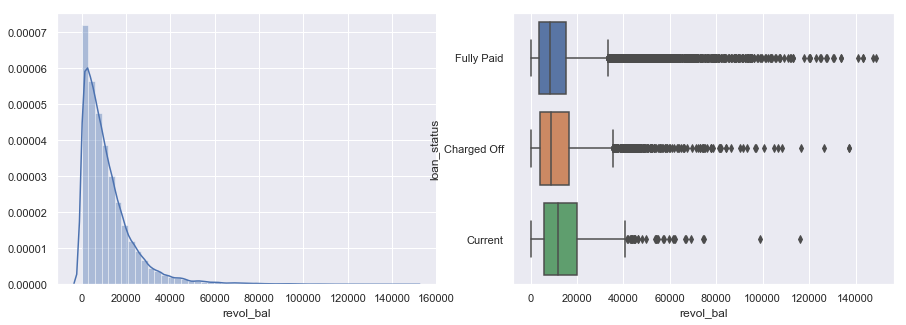

In [69]:
# Chart to distribution of revol_util

plt.figure(figsize=(15,5))
plot_distribution(loan_df, 'revol_bal')
plt.show()

In [70]:
loan_df.groupby('loan_status')['revol_bal'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,4791.0000,12296.0271,12674.5119,0.0000,3933.5000,8896.0000,16497.5000,137112.0000
Current,955.0000,14522.2471,12479.2174,0.0000,5842.0000,11862.0000,19995.0000,116244.0000
Fully Paid,28222.0000,11577.8022,12453.2025,0.0000,3459.2500,8211.0000,15405.0000,149000.0000


**Insight:**

- We don't see much influence or impact of **revol_bal** on account going to default.

---
**Column : annual_inc**  

This column shows borrowr's declared annual income.

In [71]:
loan_df.annual_inc.describe()

count    33968.0000
mean     58059.3230
std      23570.4656
min       4000.0000
25%      40000.0000
50%      55000.0000
75%      75000.0000
max     116765.0000
Name: annual_inc, dtype: float64

<Figure size 1080x360 with 0 Axes>

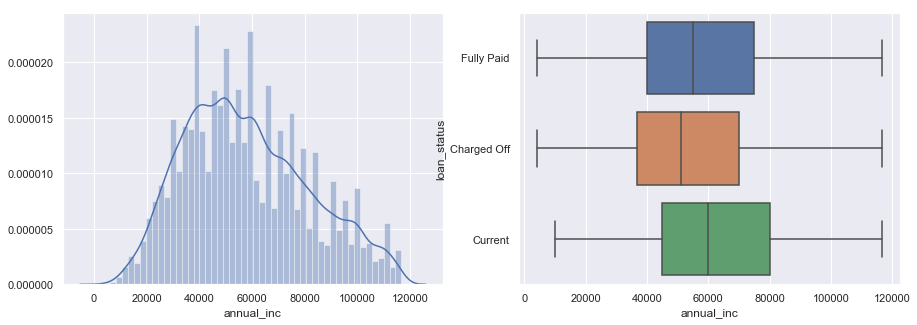

In [72]:
# Chart to see the annual income distribution

plt.figure(figsize=(15,5))
plot_distribution(loan_df, 'annual_inc')
plt.show()

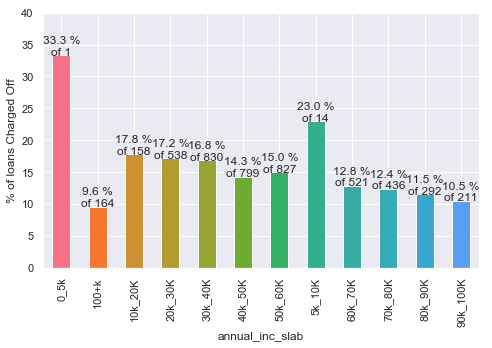

In [73]:
# Chart to compare the default % with income slab

plt.figure(figsize=(7,5))
plot_ratio_against_loan_status_by_column(loan_df, 'annual_inc_slab')

In [74]:
loan_df.groupby(by='annual_inc_slab').annual_inc_slab.count()

annual_inc_slab
0_5k           3
100+k       1710
10k_20K      888
20k_30K     3134
30k_40K     4926
40k_50K     5586
50k_60K     5526
5k_10K        61
60k_70K     4065
70k_80K     3519
80k_90K     2538
90k_100K    2012
Name: annual_inc_slab, dtype: int64

**Insight:**

- We can see that most of the annual income comes within 4k to 80k.
- Low income group people looks to be defaulting more in compare to high income group.
- In higher income group also default rate can be observed .
- We need to do some more analysis with other factors to see if annual income can really impact the default rate.

---
**Column : grade & sub_grade**  

This column shows grade/slab for LC assigned loans

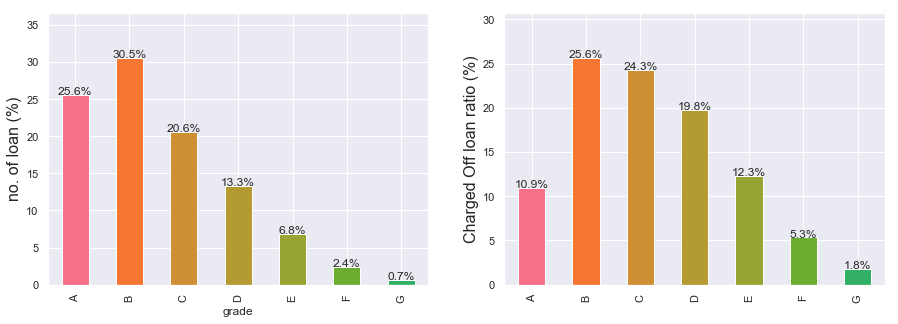

In [75]:
plt.figure(figsize=(15,5))
sub_plot_ratio_of_loan_status_by_column(loan_df, 'grade', True)

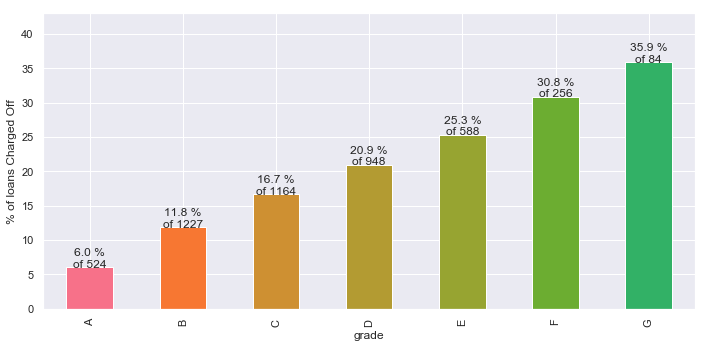

In [76]:
plt.figure(figsize=(10,5))
plot_ratio_against_loan_status_by_column(loan_df, 'grade')

**Insight:**

- We can see that , as Grade increases the default rate also increases.

<h4>Analysis on above graphs:</h4>
<ul>
    <li>People with Grade A have taken the minimal amount of loan </li>
    <li>The graph clearly outlines the lowest interest rates for people with highest grades and highest rates for lowest grades</li>
    <li> Lower grade loan requester got  larger amounts of loans </li>
</ul>



---
**Column : loan_amnt**  

The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value.



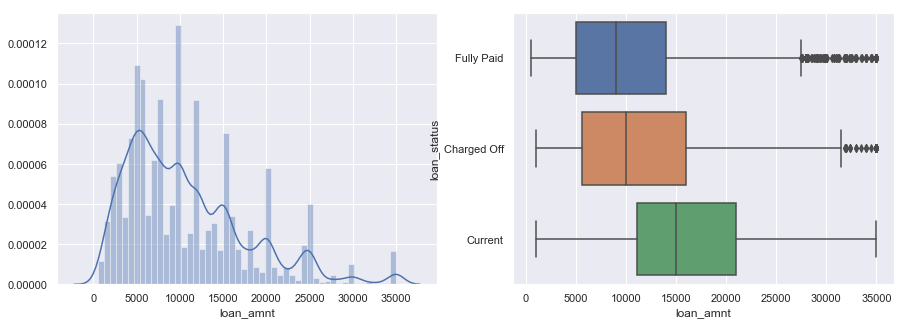

In [77]:
plot_distribution(loan_df, 'loan_amnt')

In [78]:
loan_df.groupby('loan_status')['loan_amnt'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,4791.0000,11718.7539,7718.7978,1000.0000,5600.0000,10000.0000,16000.0000,35000.0000
Current,955.0000,16164.2932,8211.0082,1000.0000,11087.5000,15000.0000,21000.0000,35000.0000
Fully Paid,28222.0000,10291.6430,6677.2332,500.0000,5000.0000,9000.0000,14000.0000,35000.0000


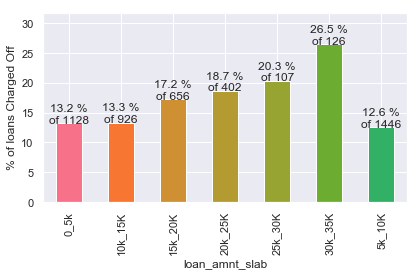

In [79]:
plot_ratio_against_loan_status_by_column(loan_df, 'loan_amnt_slab')

**Insight:**

- We can see that if loan amount increases, default rate also increases.

---
**Column : home_ownership**  

The home ownership status provided by the borrower during registration. Our values are: RENT, OWN, MORTGAGE, OTHER.

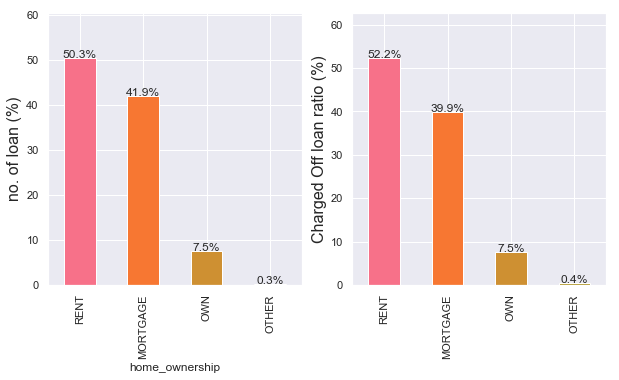

In [80]:
plt.figure(figsize=(10,5))
sub_plot_ratio_of_loan_status_by_column(loan_df, 'home_ownership')

**Insight:**

- We don't see any impact on default ratio in relation with holding a rented house / own house or mortgage.

---
**Column : int_rate**  

Interest Rate on the loan.

In [81]:
loan_df.int_rate.describe()

count   33968.0000
mean       11.9944
std         3.6837
min         5.4200
25%         9.2500
50%        11.8600
75%        14.4600
max        24.4000
Name: int_rate, dtype: float64

<Figure size 1080x360 with 0 Axes>

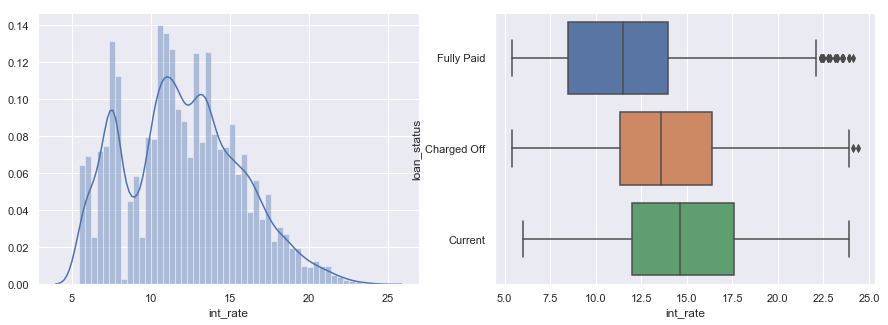

In [82]:
plt.figure(figsize=(15,5))
plot_distribution(loan_df, 'int_rate')

In [83]:
loan_df.groupby('loan_status')['int_rate'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,4791.0000,13.8172,3.6277,5.4200,11.3600,13.6100,16.4000,24.4000
Current,955.0000,14.9242,3.5221,6.0000,11.9900,14.6500,17.5800,23.9100
Fully Paid,28222.0000,11.5858,3.5578,5.4200,8.4900,11.4900,13.9800,24.1100


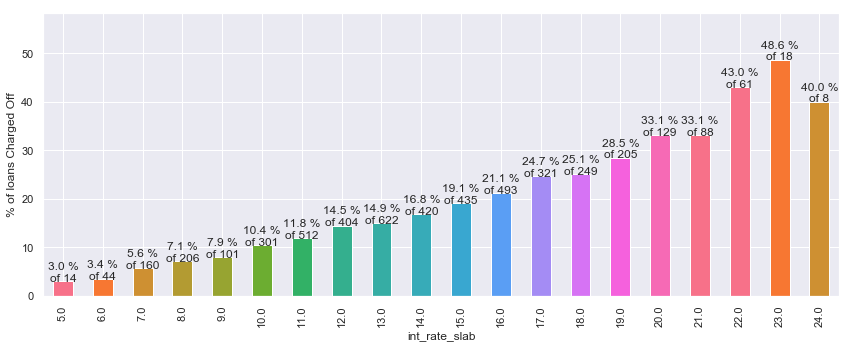

In [84]:
loan_df['int_rate_slab'] = round(loan_df.int_rate)
plt.figure(figsize=(12,5))
plot_ratio_against_loan_status_by_column(loan_df, 'int_rate_slab')

**Insight:**

- We can see that as Interest Rate increase , default rate also increases.

### Verification_status

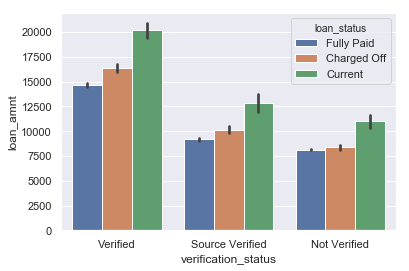

In [85]:
sns.barplot(x='verification_status', y='loan_amnt', hue="loan_status", data=loan_df, estimator=np.mean)

Higher loan amounts are Verified more often. 
We already know that larger loans are less in number, but see a higher charge off rate.
This, combined with previous observation, explains why verfied loans see a higher rate of default. It's not the verified status per se, it's the fact that <br> **higher loan amounts are riskier though they have verified more frequently** 

### emp_length

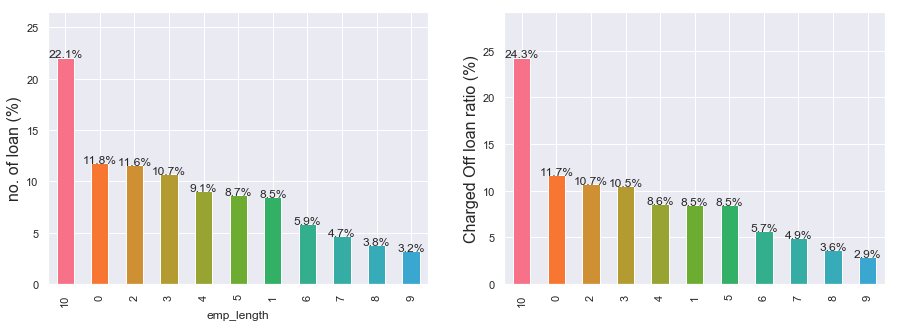

In [86]:
plt.figure(figsize=(15, 5))
sub_plot_ratio_of_loan_status_by_column(loan_df, 'emp_length')

**Observation:**
- 23% of the of loan taker have an employment length of >= 10 years.
- <mark>There is no impact of employment length to chance of loan default.</mark>

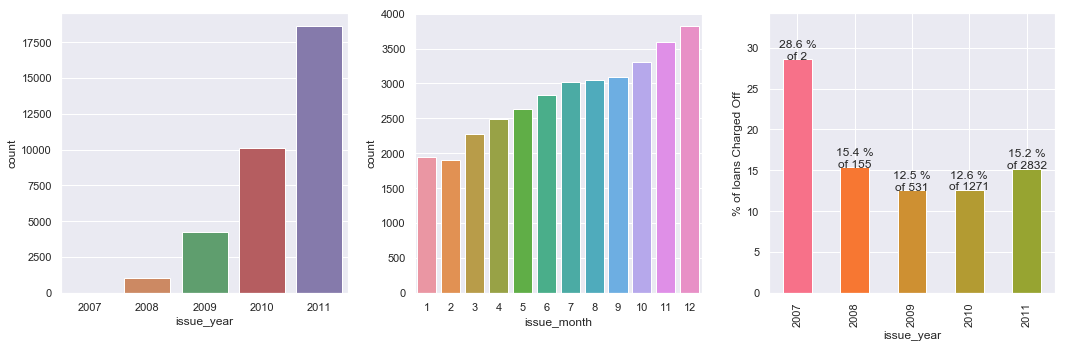

In [87]:
plt.figure(figsize=(15,5))
plt.subplot(1, 3, 1)
sns.countplot(loan_df['issue_year'], order=sorted(loan_df.issue_year.unique()))

plt.subplot(1, 3, 2)
sns.countplot(loan_df['issue_month'], order=sorted(loan_df.issue_month.unique()))

#Fraction of loans charged off and fully Paid
plt.subplot(1, 3, 3)
plot_ratio_against_loan_status_by_column(loan_df, 'issue_year')

plt.show()

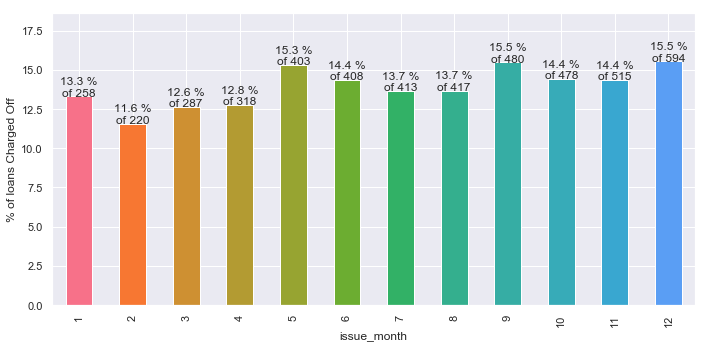

In [88]:
plt.figure(figsize=(10, 5))
plot_ratio_against_loan_status_by_column(loan_df, 'issue_month')

**Observation:**
-  Within a year, the number of loan issued rises over the month from jan to Dec. Dcember is the month of the year were the maximum number of loans are being issued
- No significant impact on issue_d like year or month

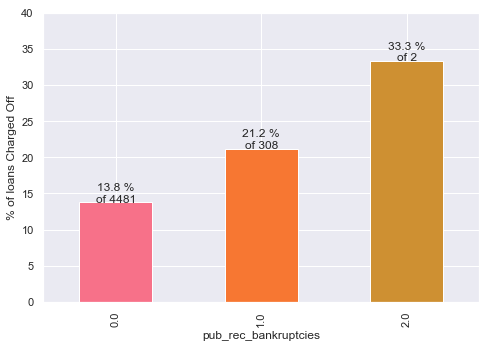

In [89]:
plt.figure(figsize=(7,5))
plot_ratio_against_loan_status_by_column(loan_df, 'pub_rec_bankruptcies')

-  <mark>The chance of Charged Off loans is higher when the borrower has a prior record of bankruptcy.</mark> 

#### Variable - earliest_cr_line
Data_Dictionary: The month the borrower's earliest reported credit line was opened.

1. earliest_cr_line_year vs % of Loan charged off for each each_cr_line_year

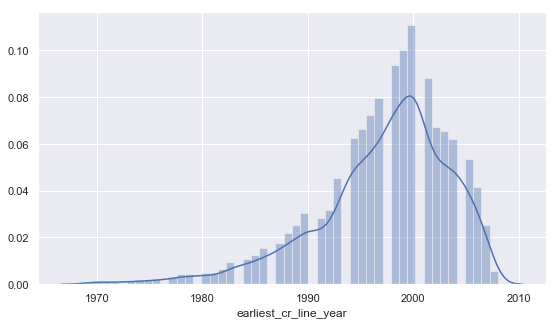

In [90]:
plt.figure(figsize=(20,5))
plt.subplot(1, 2, 1)
sns.distplot(loan_df['earliest_cr_line_year'])

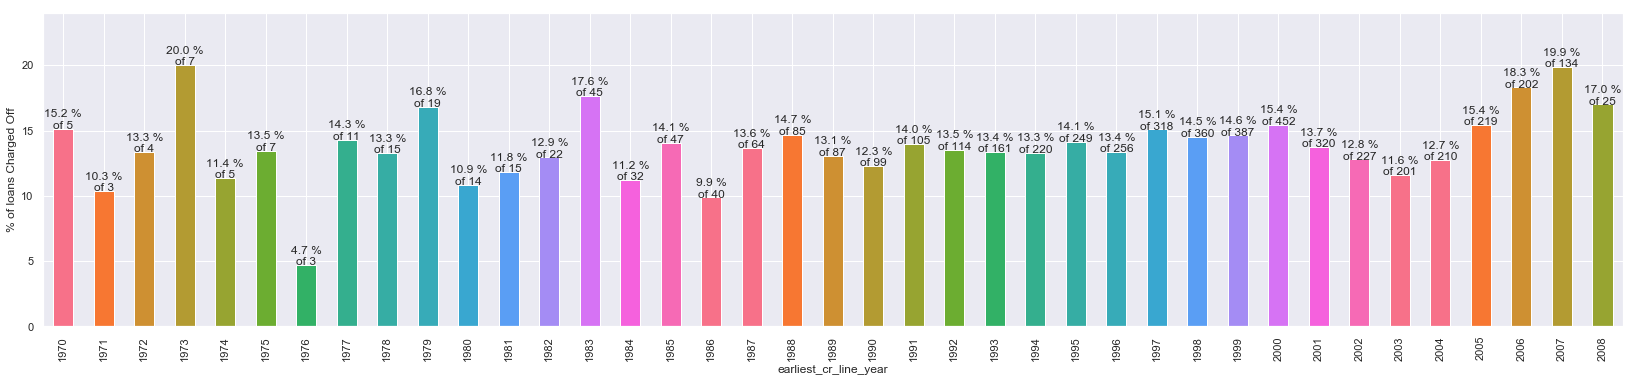

In [91]:
plt.figure(figsize=(45,10))
plt.subplot(2, 2, 1)
plot_ratio_against_loan_status_by_column(loan_df.loc[loan_df['earliest_cr_line_year'] > 1969], 'earliest_cr_line_year')
plt.show()

**Observation:**
-  8% of the loan applicants have 2000 as the year of earliest credit line.
- Newer borrowers are defauling more often. This is possibly related to the 2008 subprime crisis. 
- There was another economic crisis in US beginning in 1978 with double digit inflation. Newer borrowers of that time too defaulted more often. In general, those who take their first loans at times of recession, presumably young people, default more often. But this variable can be ignored in our analysis. 

In [92]:
loan_df = loan_df.drop('earliest_cr_line',axis=1)
loan_df = loan_df.drop('earliest_cr_line_year',axis=1)

---
#### Variable: purpose
Data_Dictionary: A category provided by the borrower for the loan request.

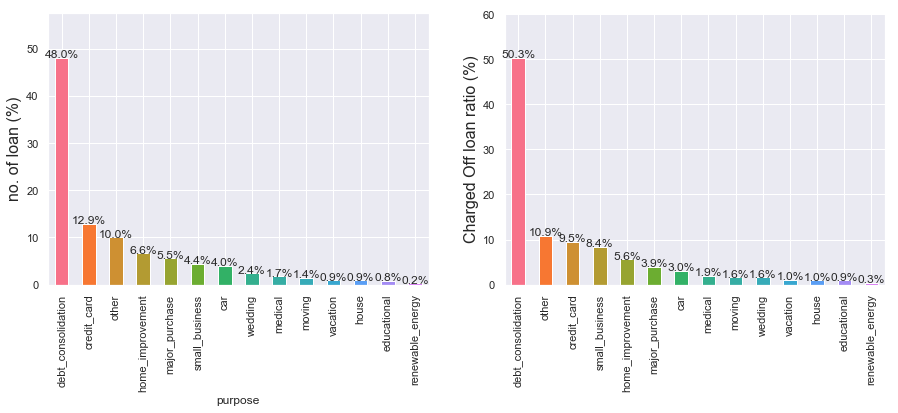

In [93]:
plt.figure(figsize=(15,5))
sub_plot_ratio_of_loan_status_by_column(loan_df, 'purpose')

**Observation:**
-  <mark>The category 'small_business' percentage **doubles from 4.4 to 8.4** for Charged Off loans.</mark> Let's see how the categories of this variable behave. 

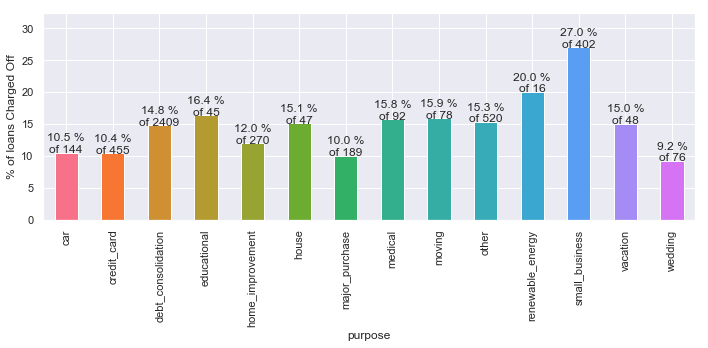

In [94]:
plt.figure(figsize=(10, 5))
plot_ratio_against_loan_status_by_column(loan_df, 'purpose')

**Observation:**
-  <mark>27% of loans for small business are Charged Off. Making them the most risky purpose.</mark> 
- Approximately ~48% of the loans are issued for the purpose of dept consolidation.
- 20% of the loans for renewable_enrgy are charged Off, but the number is too less to be of significance. 

---
#### Variable - dti
Data_Dictionary: A ratio calculated using the borrower’s total monthly debt payments on the total debt obligations, excluding mortgage and the requested LC loan, divided by the borrower’s self-reported monthly income.

<Figure size 720x360 with 0 Axes>

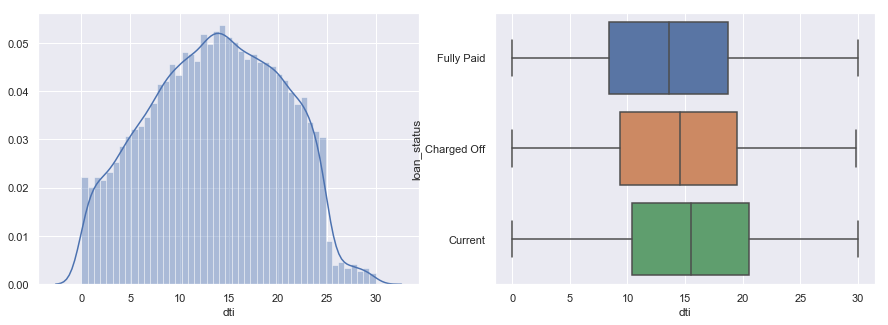

In [95]:
plt.figure(figsize=(10,5))

plot_distribution(loan_df, 'dti')

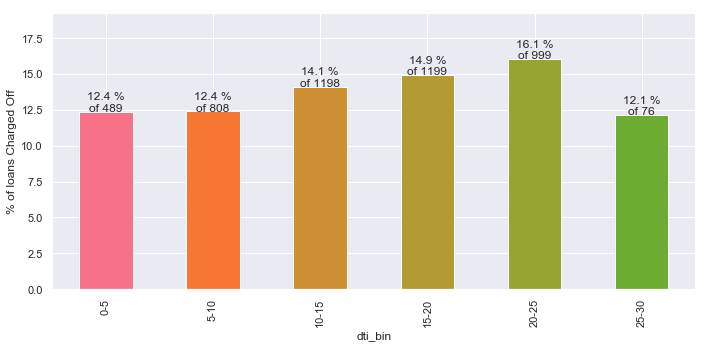

In [96]:
# Create derived variable 
loan_df['dti_bin'] = pd.cut(loan_df['dti'], [0,5,10,15,20,25,30], labels=['0-5','5-10','10-15','15-20','20-25','25-30'])
plt.figure(figsize=(10,5))
plot_ratio_against_loan_status_by_column(loan_df, 'dti_bin')

**Observation:**
- When the dti or dept payment to income ratio is higher than 20, higher percentage of loans are Charged Off
- Higher the dti higher the chances of loan being Charged Off

---
#### Variable - delinq_2yrs
Data_Dictionary: The number of 30+ days past-due incidences of delinquency in the borrower's credit file for the past 2 years.

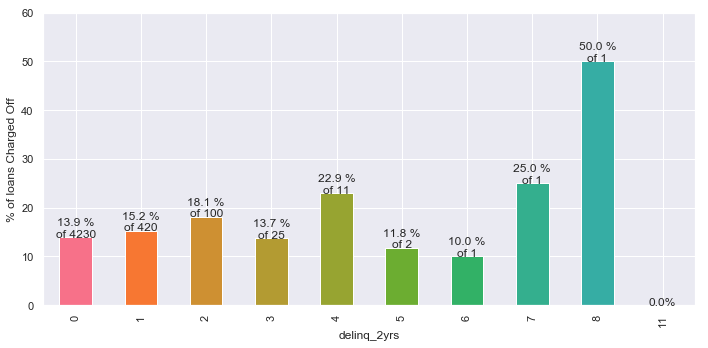

In [97]:
plt.figure(figsize=(10,5))
plot_ratio_against_loan_status_by_column(loan_df, 'delinq_2yrs')

**Observation:**
-  The number of 30+ days past-due incidences of delinquency in the borrower's credit file for the past 2 years values ranges between 0 and 11.
- There are higher chances of default if this variable is greater than 1. 

#### Variable - total_pymnt
Data_Dictionary: Payments received to date for total amount funded.

<Figure size 1080x360 with 0 Axes>

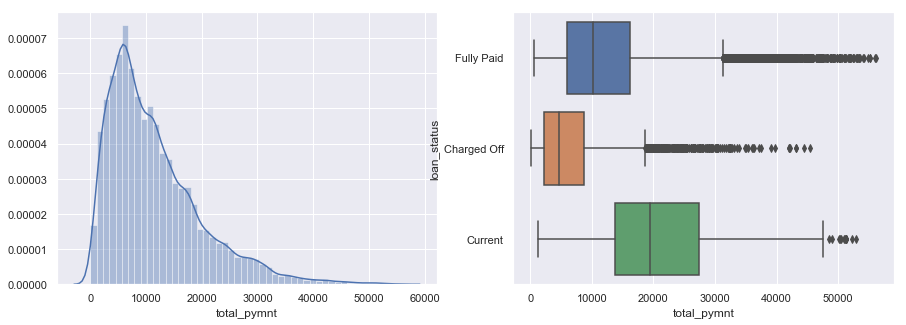

In [98]:
plt.figure(figsize=(15,5))
plot_distribution(loan_df, 'total_pymnt')
plt.show()

**Observation:**
-  The average payment received to date for the Charged Off loan is comparatively less than Fully Paid loans.
-  This variable may not be avaialble at the time of loan funding. We can drop this varaible from analysis.

In [99]:
loan_df = loan_df.drop('total_pymnt',axis=1)

---
#### Variable - last_pymnt_d
Data_Dictionary: Last month payment was received.

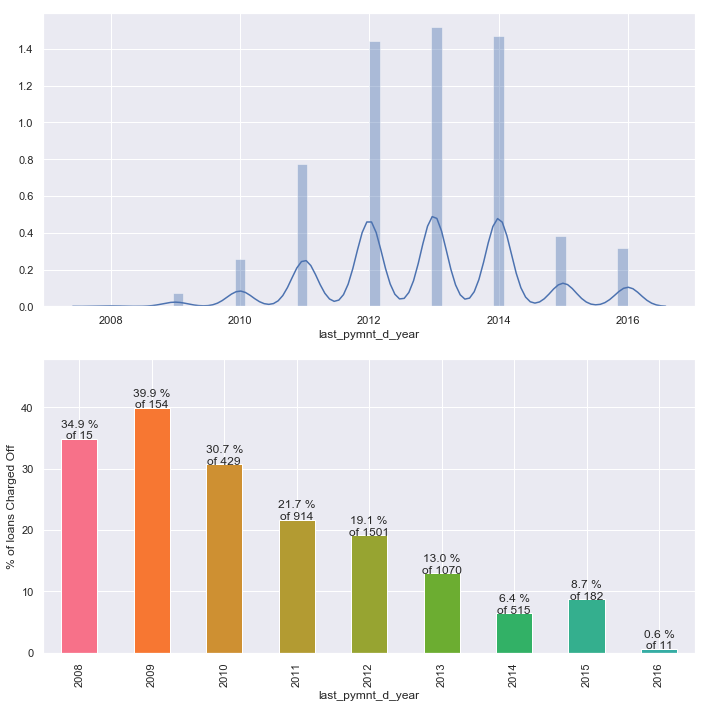

In [100]:
plt.figure(figsize=(10,10))
plt.subplot(2, 1, 1)

sns.distplot(loan_df['last_pymnt_d_year'])


plt.subplot(2, 1, 2)
plot_ratio_against_loan_status_by_column(loan_df, 'last_pymnt_d_year')
plt.show()

**Observation:**
-  Overall, around 37% of the last payment dates are during 2012-2014 period.
-  ~40% of loans with a last payment date of 2009 are Charged Off.
- This variable does not affect analysis and will be ignored. 

In [101]:
loan_df = loan_df.drop('last_pymnt_d',axis=1)
loan_df = loan_df.drop('last_pymnt_d_year',axis=1)

---
#### Variable - total_acc
Data_Dictionary: The total number of credit lines currently in the borrower's credit file.

<Figure size 1080x360 with 0 Axes>

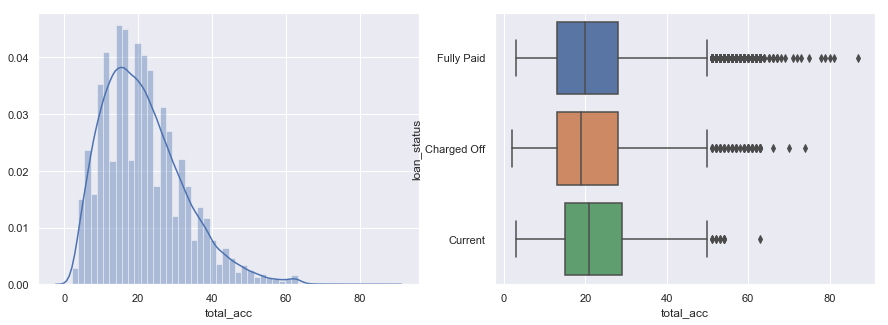

In [102]:
plt.figure(figsize=(15,5))

plot_distribution(loan_df, 'total_acc')

In [103]:
loan_df.total_acc.describe()

count   33968.0000
mean       21.3842
std        11.0415
min         2.0000
25%        13.0000
50%        20.0000
75%        28.0000
max        87.0000
Name: total_acc, dtype: float64

**Observation:**
-  The are approx. 22 average credit lines for the borrower's.
-  There is no big difference between the Charged Off and Fully Paid credit lines. We can ignore this column.

In [104]:
loan_df = loan_df.drop('total_acc',axis=1)

In [105]:
loan_df.columns

Index(['verification_status', 'purpose', 'grade', 'issue_d', 'sub_grade',
       'delinq_2yrs', 'last_credit_pull_d', 'loan_amnt', 'total_pymnt_inv',
       'out_prncp', 'home_ownership', 'open_acc', 'term', 'emp_length',
       'annual_inc', 'inq_last_6mths', 'last_pymnt_amnt', 'addr_state',
       'int_rate', 'pub_rec_bankruptcies', 'loan_status', 'dti', 'revol_bal',
       'revol_util', 'installment', 'issue_year', 'issue_month',
       'annual_inc_slab', 'loan_amnt_slab', 'int_rate_slab', 'dti_bin'],
      dtype='object')

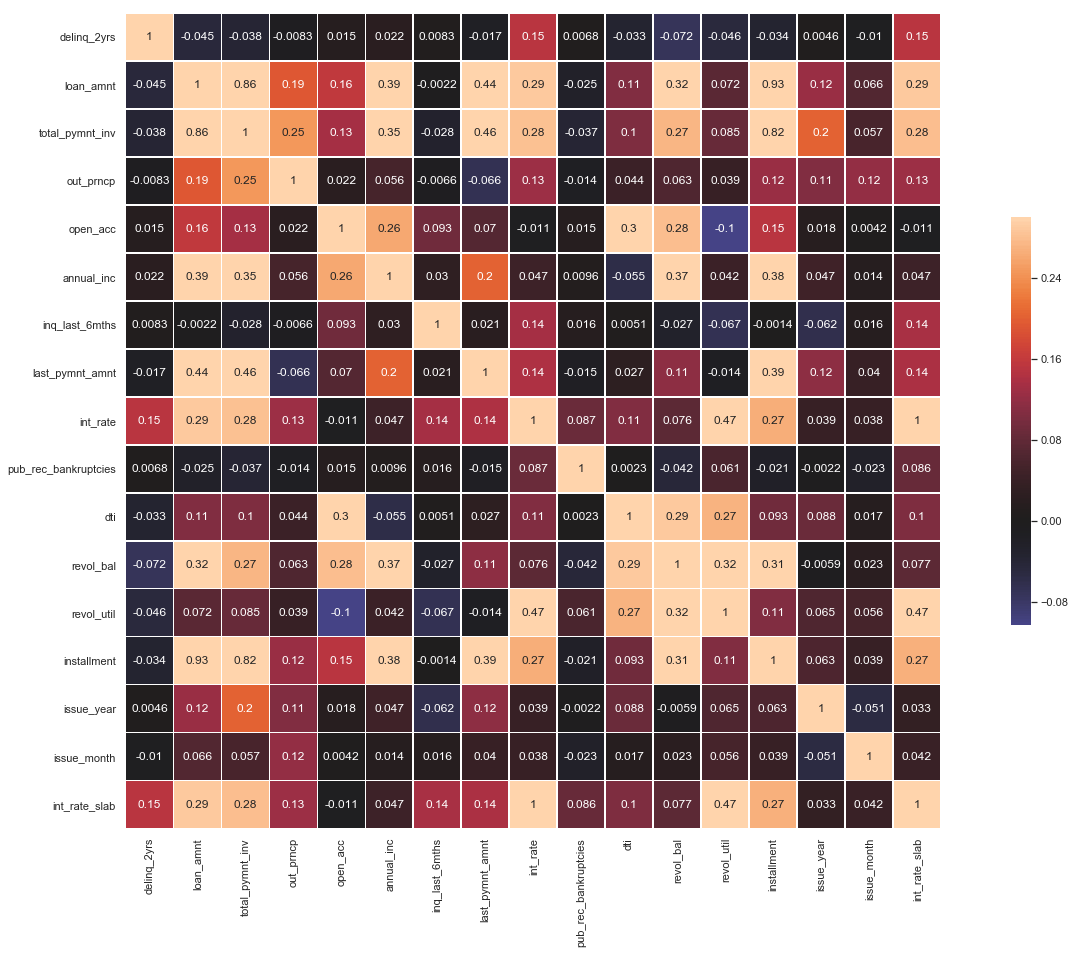

In [106]:
column_correlations(loan_df)

In [107]:
loan_df = loan_df.drop('issue_month',axis=1)

Higher loan amounts are riskier though they have verified more frequently
<br>The chance of Charged Off loans is higher when the borrower has a prior record of bankruptcy

**From the above univariate and bivariate analysis we can conclued, the below mention column to be the key factor to decide customer is going to be defaulter or not.**

**Target Variable**
    <br>Loan Status
    
**Major variables to consider for loan prediction:**
 <br>1) Purpose of Loan</br>
 <br>2) Grade</br>
 <br>3) Interest Rate</br>
 <br>4) Term</br>
 <br>5) dti</br>
 <br>6) loan_amnt</br>

## Hypothesis testing

## Extra Added Column for hypothesis testing

In [108]:
# 1
loan_df['interest_rate'] = loan_df['int_rate'].astype('float64')
loan_df['int_rate']=loan_df['interest_rate'].apply(lambda x: 'Low' if x<=12.0 else 'High')

#2
loan_df['income_in_cat'] = loan_df['annual_inc'].apply(lambda x: 'Low' if x<=50000 else ( 'Medium' if (x>50000 and x<80000)  else 'High') )

#3
loan_df['has_defaulted_loan'] = loan_df['loan_status'].apply(lambda x: 2 if x=='Charged Off' else 1).astype('int64')

###  A) Hypotheses testing on income of customer using P - Value method.

**Null and Alternate hypotheses of income of customer.**

**H0:**There is NO correlation between income of customer and loan_status.
</br>
**H1:**There is correlation between income of customer and loan_status.

In [109]:
loan_df['income_cat_in_num'] = 2
loan_df.loc[(loan_df['income_in_cat'].isin(['Low']) ), 'income_cat_in_num'] = 1
loan_df.loc[(loan_df['income_in_cat'].isin(['High']) ), 'income_cat_in_num'] = 3

In [110]:
stat, p = stats.ttest_ind(loan_df.income_cat_in_num,loan_df.has_defaulted_loan)
print('Statistics=%.2f, p=%.2f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
    print('Fail to reject H0')
else:
    print('Reject H0')

Statistics=139.03, p=0.00
Reject H0


**Observation:** Null hypothesis is rejected i.e. There is correlation between income of customer and loan_status.

###  B) Hypotheses testing on loan Term using P - Value method.

**Null and Alternate hypotheses of loan term.**

**H0:**There is NO correlation between loan term and loan_status.
</br>
**H1:**There is correlation between loan term and loan_status.

In [111]:
loan_df['term_in_num'] = np.where(loan_df['term']=='36 months', '1', '2')

In [112]:
short_term = loan_df[loan_df.term_in_num == 1]["has_defaulted_loan"]
long_term = loan_df[loan_df.term_in_num == 2]["has_defaulted_loan"]
stat, p = stats.ttest_ind(short_term, long_term)
print('Statistics=%.2f, p=%.2f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
    print('Fail to reject H0')
else:
    print('Reject H0')

Statistics=nan, p=nan
Reject H0


**Observation:** Null hypothesis is rejected i.e. There is correlation between loan term and loan_status.

###  C) Hypotheses testing on Interest rate using P - Value method.

**Null and Alternate hypotheses of Interest rate.**

**Ho:**There is NO correlation between Interest rate of loan and loan_status.
</br>
**H1:**There is correlation between Interest rate of loan and loan_status.

In [113]:
low_int_rate = loan_df[loan_df["interest_rate"] < 12.00]["has_defaulted_loan"]
high_int_rate = loan_df[loan_df["interest_rate"] >= 12.00]["has_defaulted_loan"]
stat, p = stats.ttest_ind(low_int_rate, high_int_rate)
print('Statistics=%.2f, p=%.2f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
    print('Fail to reject H0')
else:
    print('Reject H0')

Statistics=-29.05, p=0.00
Reject H0


**Observation:** Null hypotheses is rejected i.e. There is correlation between Interest rate of loan and loan_status